In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import wilcoxon
from sklearn.metrics import matthews_corrcoef
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
from PIL import Image, ImageDraw, ImageFont

## Preprocessing

In [3]:
dataset = pd.read_csv("Python_LargeClassSmell_Dataset.csv")

# Define the 12 features you want to select and normalize
selected_features = [
    'difficulty', 'scloc', 'loc', 'effort', 'time', 'volume',
    'bugs', 'lloc', 'comments', 'blanks', 'single_comments',
    'calculated_length', 'LargeClass'
]

# Create a new DataFrame with only the selected features
selected_dataset = dataset[selected_features]

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected features
selected_dataset = pd.DataFrame(scaler.fit_transform(selected_dataset), columns=selected_features)

# Save the normalized dataset with selected features to a new CSV file
selected_dataset.to_csv("Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv", index=False)

In [ ]:
dataset = pd.read_csv("Python_LongMethodSmell_Dataset.csv")

# Define the 12 features you want to select and normalize
selected_features = [
    'difficulty', 'scloc', 'effort', 'time', 'volume',
    'bugs', 'lloc', 'calculated_length', 'LongMethod'
]

# Create a new DataFrame with only the selected features
selected_dataset = dataset[selected_features]

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected features
selected_dataset = pd.DataFrame(scaler.fit_transform(selected_dataset), columns=selected_features)

# Save the normalized dataset with selected features to a new CSV file
selected_dataset.to_csv("Normalized_LongMethodSmell_Dataset.csv", index=False)

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN

# Load the normalized dataset
normalized_dataset = pd.read_csv("Normalized_LongMethodSmell_Dataset.csv")

# Define the features and target variable
features = normalized_dataset.drop('LongMethod', axis=1)
target = normalized_dataset['LongMethod']

# Apply SMOTEENN
smoteenn = SMOTEENN(sampling_strategy=0.5, random_state=42)
features_resampled, target_resampled = smoteenn.fit_resample(features, target)

# Combine the resampled features and target into a new DataFrame
resampled_dataset = pd.concat([pd.DataFrame(features_resampled, columns=features.columns), pd.Series(target_resampled, name='LongMethod')], axis=1)

# Save the balanced dataset to a new CSV file
resampled_dataset.to_csv("Balanced_LongMethodSmell_Dataset.csv", index=False)


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN

# Load the normalized dataset
normalized_dataset = pd.read_csv("Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv")

# Define the features and target variable
features = normalized_dataset.drop('LargeClass', axis=1)
target = normalized_dataset['LargeClass']

# Apply SMOTEENN
smoteenn = SMOTEENN(sampling_strategy=0.5, random_state=42)
features_resampled, target_resampled = smoteenn.fit_resample(features, target)

# Combine the resampled features and target into a new DataFrame
resampled_dataset = pd.concat([pd.DataFrame(features_resampled, columns=features.columns), pd.Series(target_resampled, name='LargeClass')], axis=1)

# Save the balanced dataset to a new CSV file
resampled_dataset.to_csv("Balanced_LargeClassSmell_Dataset.csv", index=False)

## Descriptive Analysis

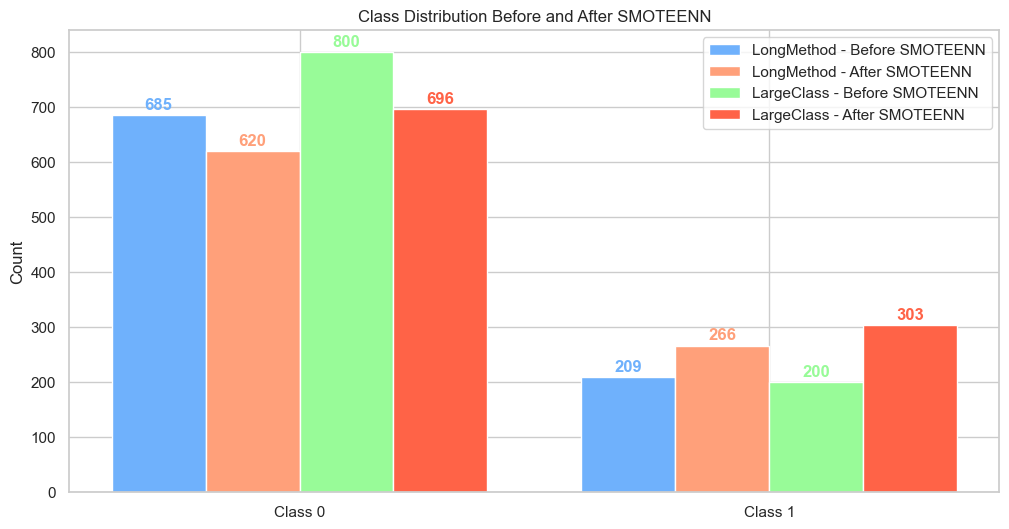

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler

# Load the original dataset for LongMethod
dataset_long_method = pd.read_csv("Python_LongMethodSmell_Dataset.csv")
features_long_method = dataset_long_method.drop('LongMethod', axis=1)
target_long_method = dataset_long_method['LongMethod']

# Load the original dataset for LargeClass
dataset_large_class = pd.read_csv("Python_LargeClassSmell_Dataset.csv")
features_large_class = dataset_large_class.drop('LargeClass', axis=1)
target_large_class = dataset_large_class['LargeClass']

# Create a Min-Max scaler for LongMethod
scaler_long_method = MinMaxScaler()
features_normalized_long_method = pd.DataFrame(scaler_long_method.fit_transform(features_long_method),
                                               columns=features_long_method.columns)

# Create a Min-Max scaler for LargeClass
scaler_large_class = MinMaxScaler()
features_normalized_large_class = pd.DataFrame(scaler_large_class.fit_transform(features_large_class),
                                               columns=features_large_class.columns)

# Apply SMOTEENN for LongMethod
smoteenn_long_method = SMOTEENN(sampling_strategy=0.5, random_state=42)
features_resampled_long_method, target_resampled_long_method = smoteenn_long_method.fit_resample(
    features_normalized_long_method, target_long_method)

# Apply SMOTEENN for LargeClass
smoteenn_large_class = SMOTEENN(sampling_strategy=0.5, random_state=42)
features_resampled_large_class, target_resampled_large_class = smoteenn_large_class.fit_resample(
    features_normalized_large_class, target_large_class)

# Plot the class distribution before and after for both LongMethod and LargeClass
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index_long_method = range(len(target_long_method.value_counts()))
index_large_class = [i + bar_width for i in index_long_method]

# Plot bars before SMOTEENN for LongMethod
ax.bar(index_long_method, target_long_method.value_counts(), bar_width, color='#6FB1FC', label='LongMethod - Before SMOTEENN')

# Plot bars after SMOTEENN for LongMethod
ax.bar(index_large_class, target_resampled_long_method.value_counts(), bar_width, color='#FFA07A',
       label='LongMethod - After SMOTEENN')

# Plot bars before SMOTEENN for LargeClass
ax.bar([i + 2 * bar_width for i in index_long_method], target_large_class.value_counts(), bar_width,
       color='#98FB98', label='LargeClass - Before SMOTEENN')

# Plot bars after SMOTEENN for LargeClass
ax.bar([i + 3 * bar_width for i in index_long_method], target_resampled_large_class.value_counts(), bar_width,
       color='#FF6347', label='LargeClass - After SMOTEENN')

# Add count numbers on top of each bar
for i, count in enumerate(target_long_method.value_counts()):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', color='#6FB1FC', fontweight='bold')

for i, count in enumerate(target_resampled_long_method.value_counts()):
    plt.text(i + bar_width, count + 5, str(count), ha='center', va='bottom', color='#FFA07A', fontweight='bold')

for i, count in enumerate(target_large_class.value_counts()):
    plt.text(i + 2 * bar_width, count + 5, str(count), ha='center', va='bottom', color='#98FB98', fontweight='bold')

for i, count in enumerate(target_resampled_large_class.value_counts()):
    plt.text(i + 3 * bar_width, count + 5, str(count), ha='center', va='bottom', color='#FF6347', fontweight='bold')

# Set labels and title
ax.set_xticks([i + 1.5 * bar_width for i in index_long_method])
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.set_ylabel('Count')
ax.set_title('Class Distribution Before and After SMOTEENN')
ax.legend()

# Show the plot
plt.show()


### Long Method

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler

# Load the original dataset
dataset = pd.read_csv("Python_LongMethodSmell_Dataset.csv")

# Define the features and target variable
features = dataset.drop('LongMethod', axis=1)
target = dataset['LongMethod']

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the features
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Display class counts before applying SMOTEENN
class_counts_before = target.value_counts()
print("Class Counts Before SMOTEENN:")
print(class_counts_before)

class_ratio_before = class_counts_before / len(target) * 100
print("\nClass Ratio Before SMOTEENN:")
print(class_ratio_before)

# Apply SMOTEENN
smoteenn = SMOTEENN(sampling_strategy=0.5, random_state=42)
features_resampled, target_resampled = smoteenn.fit_resample(features_normalized, target)

# Display class counts after applying SMOTEENN
class_counts_after = target_resampled.value_counts()
print("\nClass Counts After SMOTEENN:")
print(class_counts_after)

class_ratio_after = class_counts_after / len(target_resampled) * 100
print("\nClass Ratio After SMOTEENN:")
print(class_ratio_after)


Class Counts Before SMOTEENN:
0    685
1    209
Name: LongMethod, dtype: int64

Class Ratio Before SMOTEENN:
0    76.621924
1    23.378076
Name: LongMethod, dtype: float64

Class Counts After SMOTEENN:
0    620
1    266
Name: LongMethod, dtype: int64

Class Ratio After SMOTEENN:
0    69.977427
1    30.022573
Name: LongMethod, dtype: float64


In [3]:
import pandas as pd

# Load the normalized dataset
normalized_dataset = pd.read_csv("Normalized_LongMethodSmell_Dataset.csv")

# Display summary statistics
summary_stats_normalized = normalized_dataset.describe()
print("Summary Statistics for Normalized Dataset:")
print(summary_stats_normalized)

# Correlation matrix
correlation_matrix_normalized = normalized_dataset.corr()
print("\nCorrelation Matrix for Normalized Dataset:")
print(correlation_matrix_normalized)



Summary Statistics for Normalized Dataset:
       difficulty       scloc      effort        time      volume        bugs  \
count  894.000000  894.000000  894.000000  894.000000  894.000000  894.000000   
mean     0.163956    0.040673    0.023601    0.023601    0.029800    0.029800   
std      0.182549    0.058936    0.070984    0.070984    0.068849    0.068849   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.028419    0.009524    0.000193    0.000193    0.001757    0.001757   
50%      0.101497    0.021769    0.001769    0.001769    0.008134    0.008134   
75%      0.233451    0.054422    0.013225    0.013225    0.029046    0.029046   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             lloc  calculated_length  LongMethod  
count  894.000000         894.000000  894.000000  
mean     0.039973           0.027879    0.233781  
std      0.059461           0.061930    0.423471  
min      0.000000      

In [1]:
import pandas as pd

# Load the balanced dataset
balanced_dataset = pd.read_csv("Balanced_LongMethodSmell_Dataset.csv")

# Display summary statistics
summary_stats_balanced = balanced_dataset.describe()
print("Summary Statistics for Balanced Dataset:")
print(summary_stats_balanced)

# Correlation matrix
correlation_matrix_balanced = balanced_dataset.corr()
print("\nCorrelation Matrix for Balanced Dataset:")
print(correlation_matrix_balanced)


Summary Statistics for Balanced Dataset:
       difficulty       scloc      effort        time      volume        bugs  \
count  896.000000  896.000000  896.000000  896.000000  896.000000  896.000000   
mean     0.181102    0.043537    0.031238    0.031238    0.037813    0.037813   
std      0.196050    0.049792    0.075053    0.075053    0.075305    0.075305   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.028419    0.009524    0.000199    0.000199    0.001757    0.001757   
50%      0.112584    0.021769    0.002195    0.002195    0.008776    0.008776   
75%      0.280606    0.066667    0.021063    0.021063    0.038184    0.038184   
max      1.000000    0.412245    0.537263    0.537263    1.000000    1.000000   

             lloc  calculated_length  LongMethod  
count  896.000000         896.000000  896.000000  
mean     0.043253           0.034845    0.309152  
std      0.049967           0.066005    0.462402  
min      0.000000        

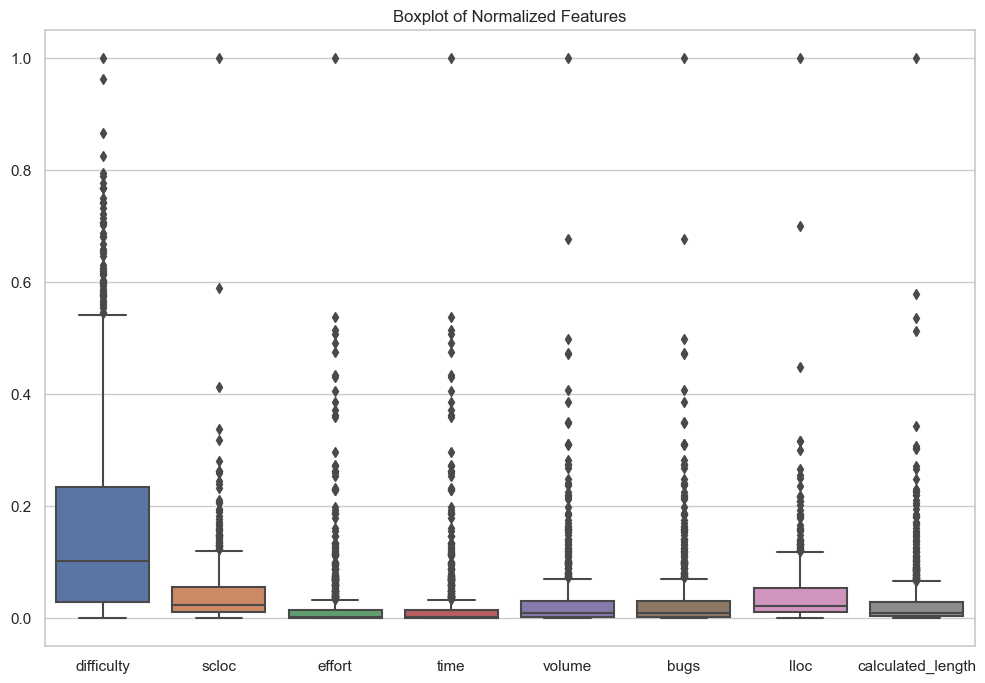

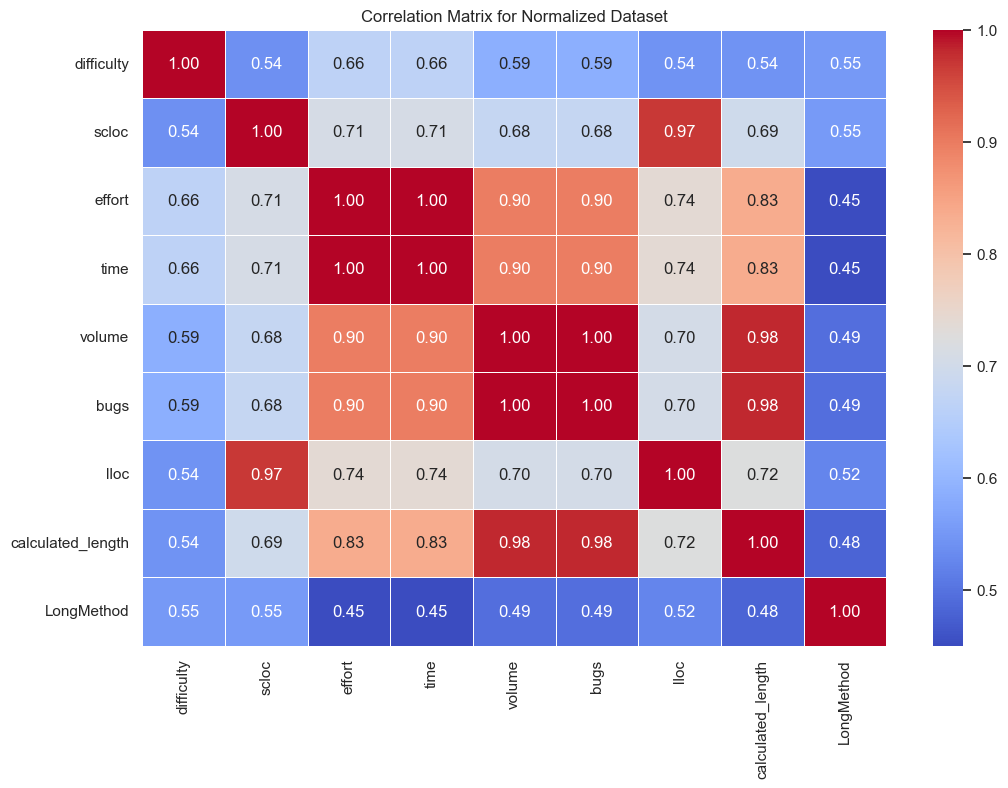

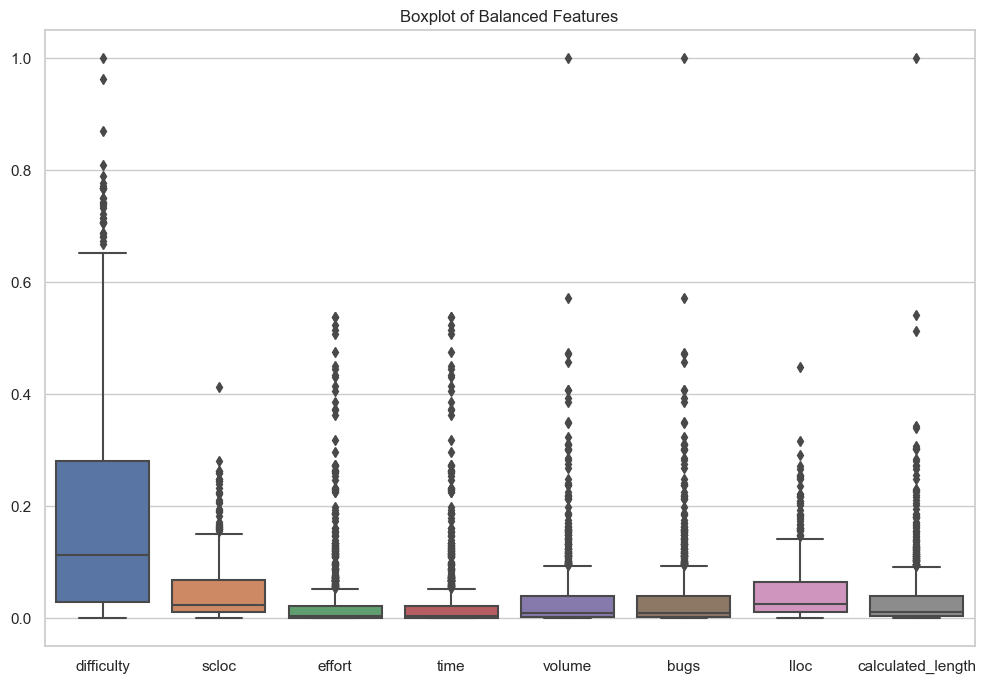

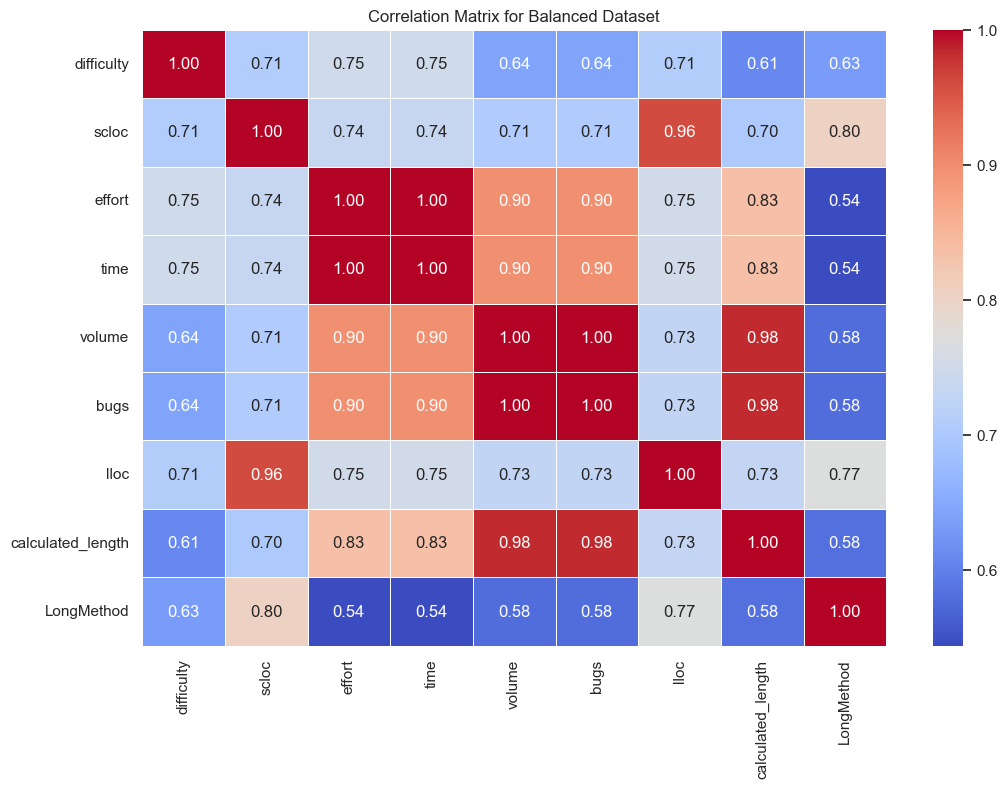

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
normalized_dataset = pd.read_csv("Normalized_LongMethodSmell_Dataset.csv")

# Display summary statistics using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=normalized_dataset.drop(columns="LongMethod"))
plt.title("Boxplot of Normalized Features")
plt.show()

# Display correlation matrix using Seaborn
plt.figure(figsize=(12, 8))
correlation_matrix_normalized = normalized_dataset.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Normalized Dataset")
plt.show()

# Load the balanced dataset
balanced_dataset = pd.read_csv("Balanced_LongMethodSmell_Dataset.csv")

# Display summary statistics using Seaborn for the balanced dataset
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=balanced_dataset.drop(columns="LongMethod"))
plt.title("Boxplot of Balanced Features")
plt.show()

# Display correlation matrix using Seaborn for the balanced dataset
plt.figure(figsize=(12, 8))
correlation_matrix_balanced = balanced_dataset.corr()
sns.heatmap(correlation_matrix_balanced, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Balanced Dataset")
plt.show()


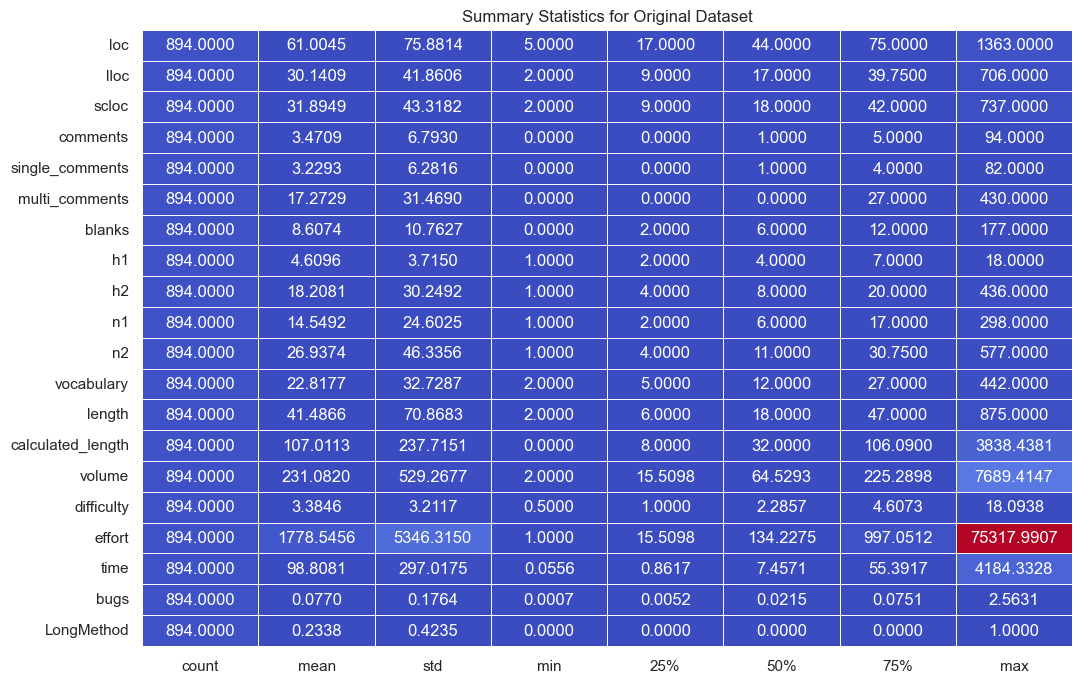

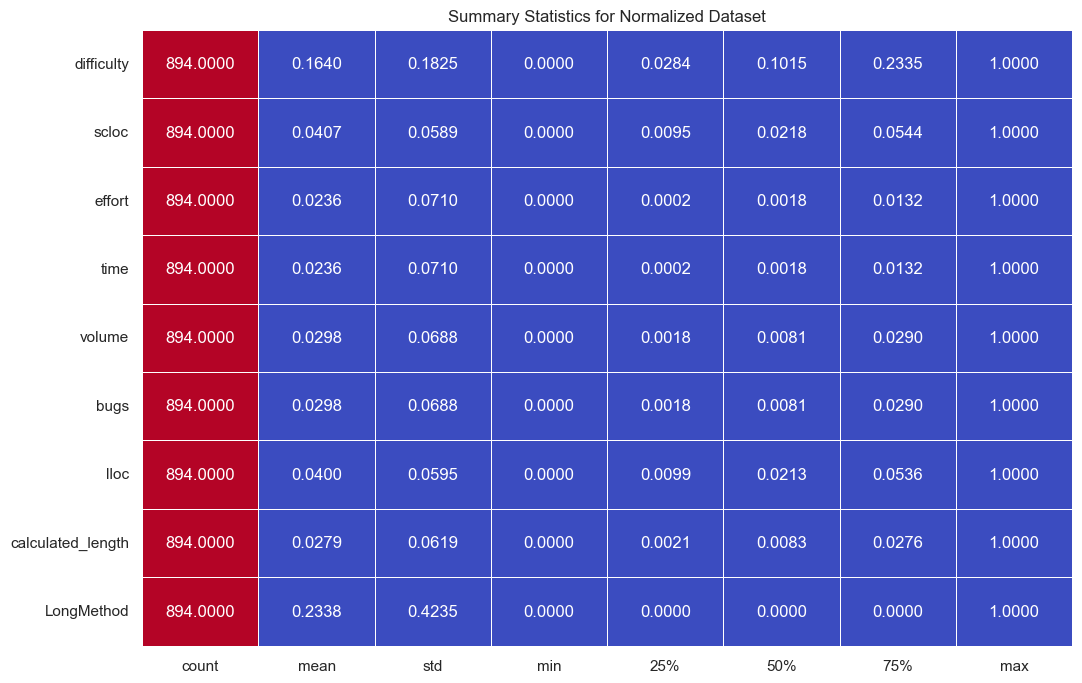

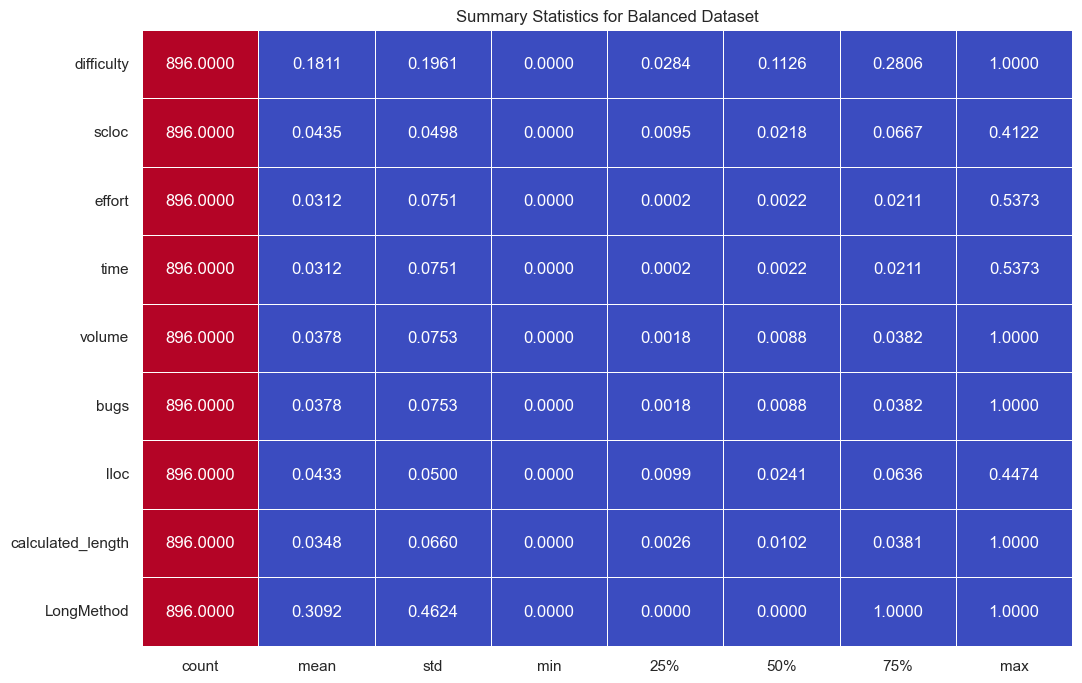

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
original_dataset = pd.read_csv("Python_LongMethodSmell_Dataset.csv")

# Display summary statistics in a table using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.heatmap(original_dataset.describe().transpose(), annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5, cbar=False)
plt.title("Summary Statistics for Original Dataset")
plt.show()

# Load the normalized dataset
normalized_dataset = pd.read_csv("Normalized_LongMethodSmell_Dataset.csv")

# Display summary statistics in a table using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.heatmap(normalized_dataset.describe().transpose(), annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5, cbar=False)
plt.title("Summary Statistics for Normalized Dataset")
plt.show()

# Load the balanced dataset
balanced_dataset = pd.read_csv("Balanced_LongMethodSmell_Dataset.csv")

# Display summary statistics in a table using Seaborn for the balanced dataset
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.heatmap(balanced_dataset.describe().transpose(), annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5, cbar=False)
plt.title("Summary Statistics for Balanced Dataset")
plt.show()


### Large Class

Class Counts Before SMOTEENN:
0    800
1    200
Name: LargeClass, dtype: int64

Class Ratio Before SMOTEENN:
0    80.0
1    20.0
Name: LargeClass, dtype: float64

Class Counts After SMOTEENN:
0    696
1    303
Name: LargeClass, dtype: int64

Class Ratio After SMOTEENN:
0    69.66967
1    30.33033
Name: LargeClass, dtype: float64


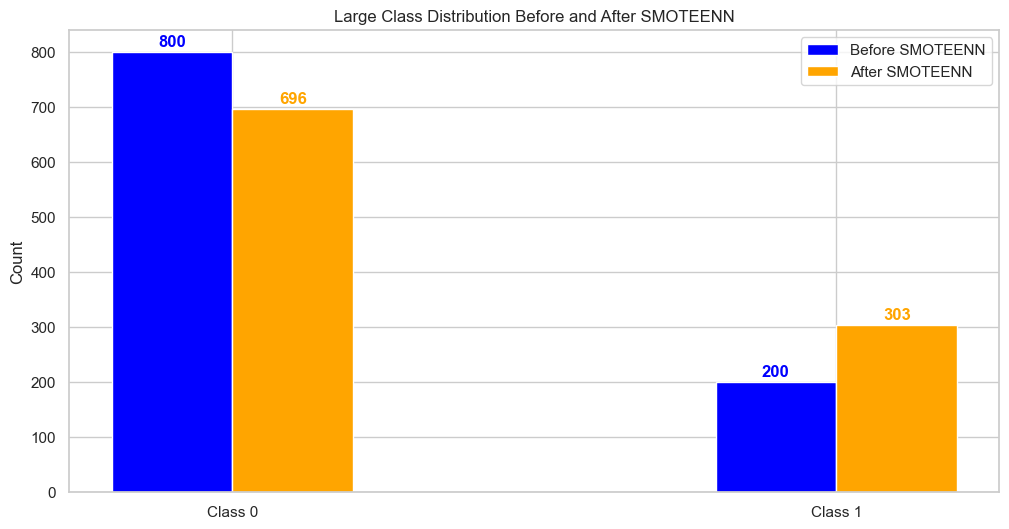

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler

# Load the original dataset
dataset = pd.read_csv("Python_LargeClassSmell_Dataset.csv")

# Define the features and target variable
features = dataset.drop('LargeClass', axis=1)
target = dataset['LargeClass']

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the features
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Display class counts before applying SMOTEENN
class_counts_before = target.value_counts()
print("Class Counts Before SMOTEENN:")
print(class_counts_before)

class_ratio_before = class_counts_before / len(target) * 100
print("\nClass Ratio Before SMOTEENN:")
print(class_ratio_before)

# Apply SMOTEENN
smoteenn = SMOTEENN(sampling_strategy=0.5, random_state=42)
features_resampled, target_resampled = smoteenn.fit_resample(features_normalized, target)

# Display class counts after applying SMOTEENN
class_counts_after = target_resampled.value_counts()
print("\nClass Counts After SMOTEENN:")
print(class_counts_after)

class_ratio_after = class_counts_after / len(target_resampled) * 100
print("\nClass Ratio After SMOTEENN:")
print(class_ratio_after)


# Plot the class distribution before and after
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = range(len(class_counts_before))

# Plot bars before SMOTEENN
ax.bar(index, class_counts_before, bar_width, color='blue', label='Before SMOTEENN')

# Plot bars after SMOTEENN
ax.bar([i + bar_width for i in index], class_counts_after, bar_width, color='orange', label='After SMOTEENN')

# Add count numbers on top of each bar
for i, count in enumerate(class_counts_before):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', color='blue', fontweight='bold')

for i, count in enumerate(class_counts_after):
    plt.text(i + bar_width, count + 5, str(count), ha='center', va='bottom', color='orange', fontweight='bold')

# Set labels and title
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.set_ylabel('Count')
ax.set_title('Large Class Distribution Before and After SMOTEENN')
ax.legend()

# Show the plot
plt.show()


In [6]:
import pandas as pd

# Load the normalized dataset
original_dataset = pd.read_csv("Python_LargeClassSmell_Dataset.csv")

# Display summary statistics
summary_stats_normalized = original_dataset.describe()
print("Summary Statistics for Original Dataset:")
print(summary_stats_normalized)

# Correlation matrix
correlation_matrix_normalized = original_dataset.corr()
print("\nCorrelation Matrix for Original Dataset:")
print(correlation_matrix_normalized)


Summary Statistics for Original Dataset:
               loc         lloc        scloc     comments  single_comments  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000   
mean    163.553000    92.958000   105.224000    10.552000        10.874000   
std     426.301163   195.963057   239.407698    25.787677        26.422458   
min       5.000000     2.000000     2.000000     0.000000         0.000000   
25%      26.000000    16.000000    17.000000     0.000000         0.000000   
50%      54.000000    33.000000    35.000000     2.000000         2.000000   
75%     135.000000    83.000000    93.000000     9.000000         9.000000   
max    7112.000000  2401.000000  4049.000000   291.000000       264.000000   

       multi_comments       blanks          h1           h2           n1  \
count     1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean        21.923000    25.532000     4.73200    35.863000    27.622000   
std        132.176934    78.

In [8]:
import pandas as pd

# Load the normalized dataset
normalized_dataset = pd.read_csv("Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv")

# Display summary statistics
summary_stats_normalized = normalized_dataset.describe()
print("Summary Statistics for Normalized Dataset:")
print(summary_stats_normalized)

# Correlation matrix
correlation_matrix_normalized = normalized_dataset.corr()
print("\nCorrelation Matrix for Normalized Dataset:")
print(correlation_matrix_normalized)



Summary Statistics for Normalized Dataset:
        difficulty        scloc          loc       effort         time  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.098125     0.025506     0.022309     0.010272     0.010272   
std       0.119473     0.059157     0.059983     0.056179     0.056179   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.018538     0.003706     0.002955     0.000035     0.000035   
50%       0.055613     0.008154     0.006895     0.000372     0.000372   
75%       0.134818     0.022486     0.018292     0.003061     0.003061   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            volume         bugs         lloc     comments       blanks  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.018872     0.018872     0.037915     0.036261     0.016698   
std       0.059833     0.059833     0.081685     0.088617     0.0514

In [9]:
import pandas as pd

# Load the balanced dataset
balanced_dataset = pd.read_csv("Balanced_LargeClassSmell_Dataset.csv")

# Display summary statistics
summary_stats_balanced = balanced_dataset.describe()
print("Summary Statistics for Balanced Dataset:")
print(summary_stats_balanced)

# Correlation matrix
correlation_matrix_balanced = balanced_dataset.corr()
print("\nCorrelation Matrix for Balanced Dataset:")
print(correlation_matrix_balanced)



Summary Statistics for Balanced Dataset:
        difficulty        scloc          loc       effort         time  \
count  1011.000000  1011.000000  1011.000000  1011.000000  1011.000000   
mean      0.112735     0.036291     0.032609     0.016754     0.016754   
std       0.131583     0.072411     0.078837     0.076937     0.076937   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.018538     0.003706     0.003096     0.000037     0.000037   
50%       0.064881     0.008648     0.007880     0.000464     0.000464   
75%       0.166210     0.042254     0.036454     0.005873     0.005873   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            volume         bugs         lloc     comments       blanks  \
count  1011.000000  1011.000000  1011.000000  1011.000000  1011.000000   
mean      0.027651     0.027651     0.053542     0.051066     0.024291   
std       0.080904     0.080904     0.101190     0.112623     0.070106

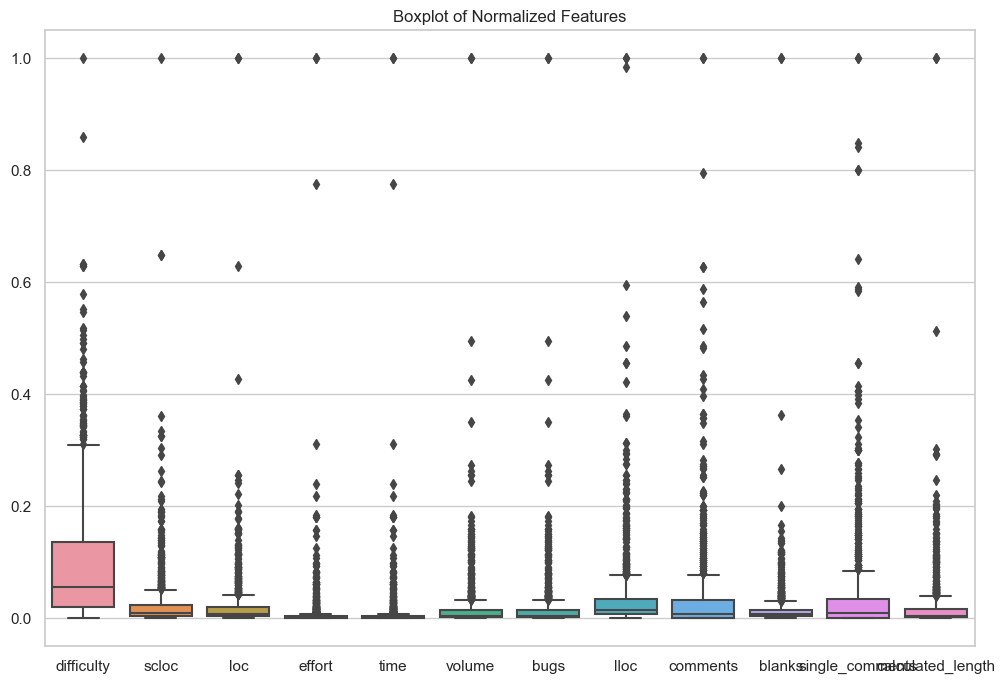

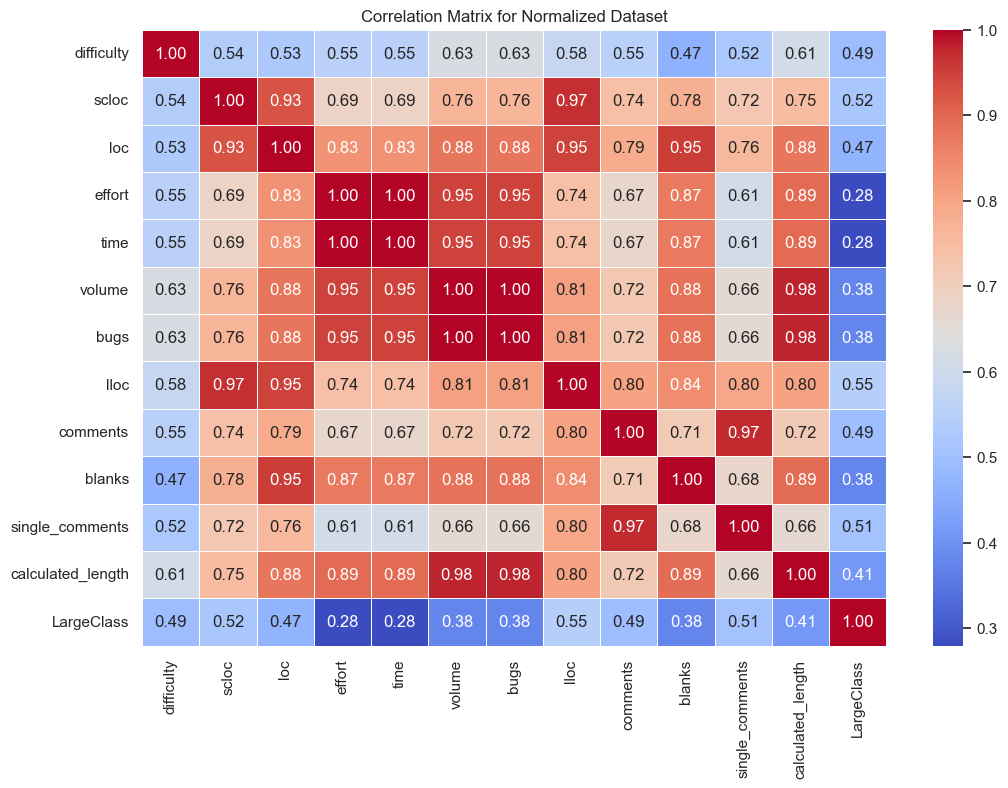

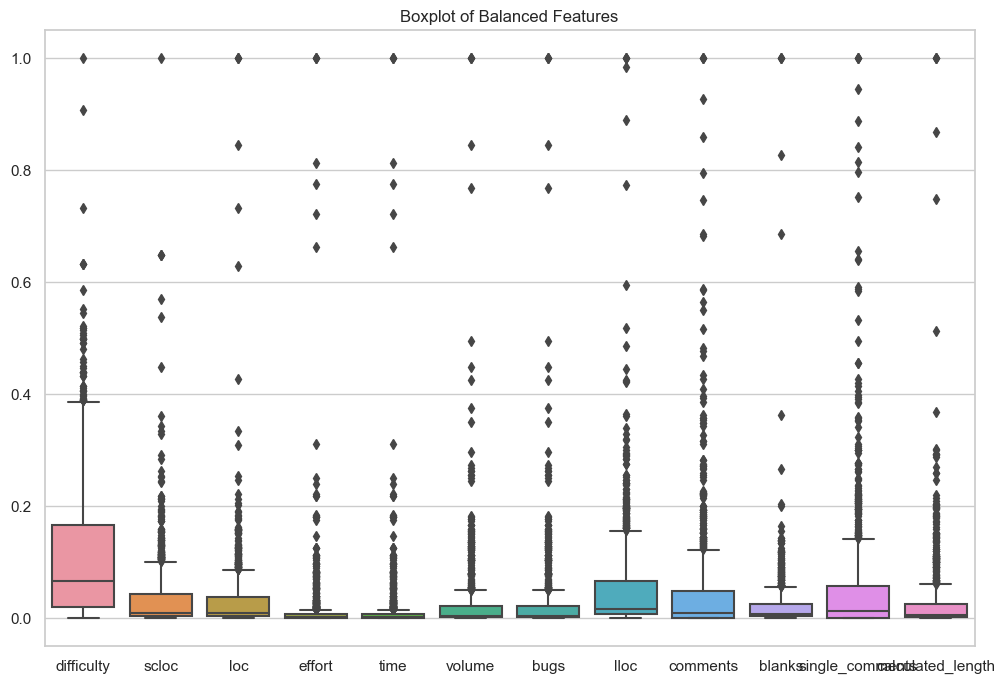

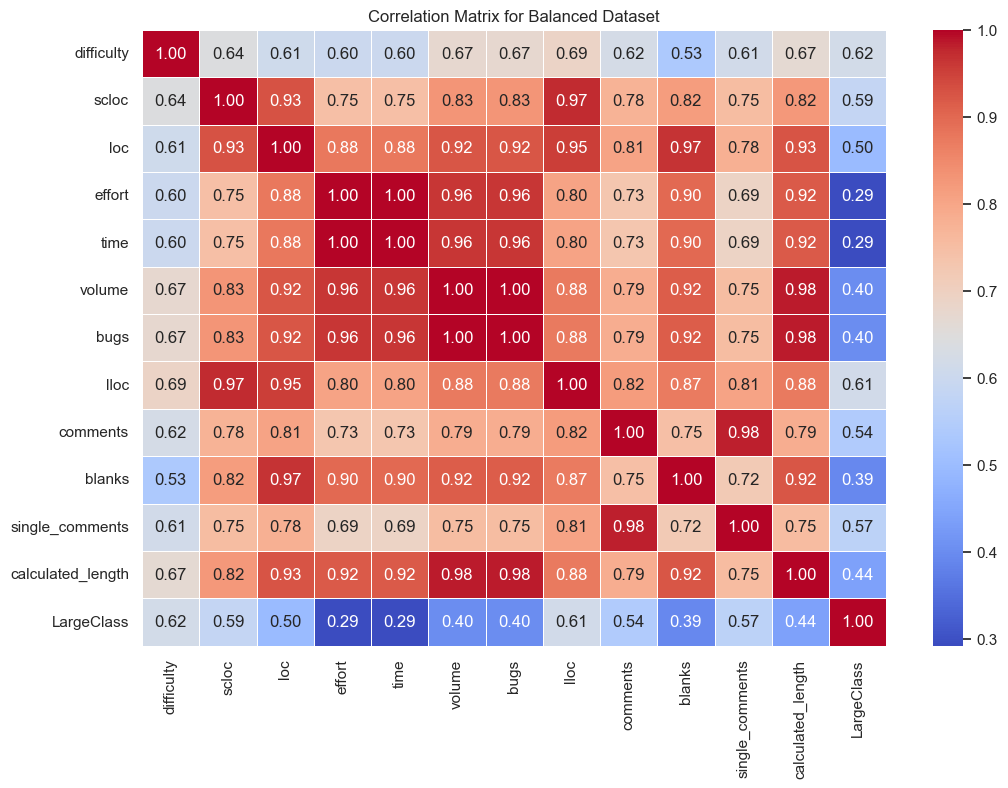

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
normalized_dataset = pd.read_csv("Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv")

# Display summary statistics using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=normalized_dataset.drop(columns="LargeClass"))
plt.title("Boxplot of Normalized Features")
plt.show()

# Display correlation matrix using Seaborn
plt.figure(figsize=(12, 8))
correlation_matrix_normalized = normalized_dataset.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Normalized Dataset")
plt.show()

# Load the balanced dataset
balanced_dataset = pd.read_csv("Balanced_LargeClassSmell_Dataset.csv")

# Display summary statistics using Seaborn for the balanced dataset
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=balanced_dataset.drop(columns="LargeClass"))
plt.title("Boxplot of Balanced Features")
plt.show()

# Display correlation matrix using Seaborn for the balanced dataset
plt.figure(figsize=(12, 8))
correlation_matrix_balanced = balanced_dataset.corr()
sns.heatmap(correlation_matrix_balanced, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Balanced Dataset")
plt.show()


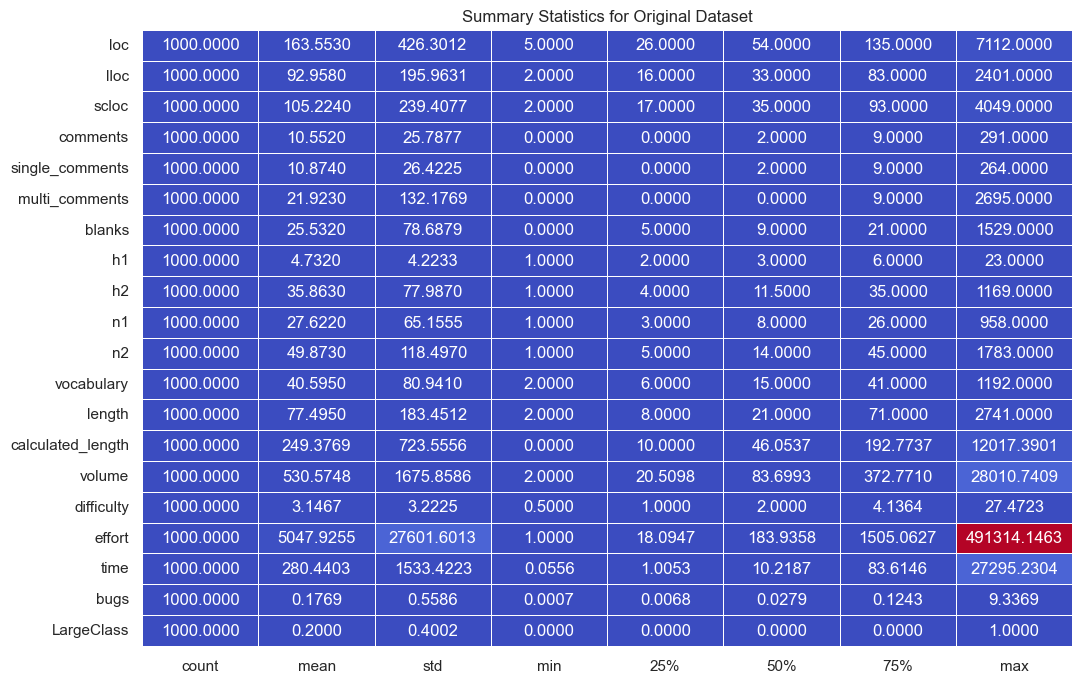

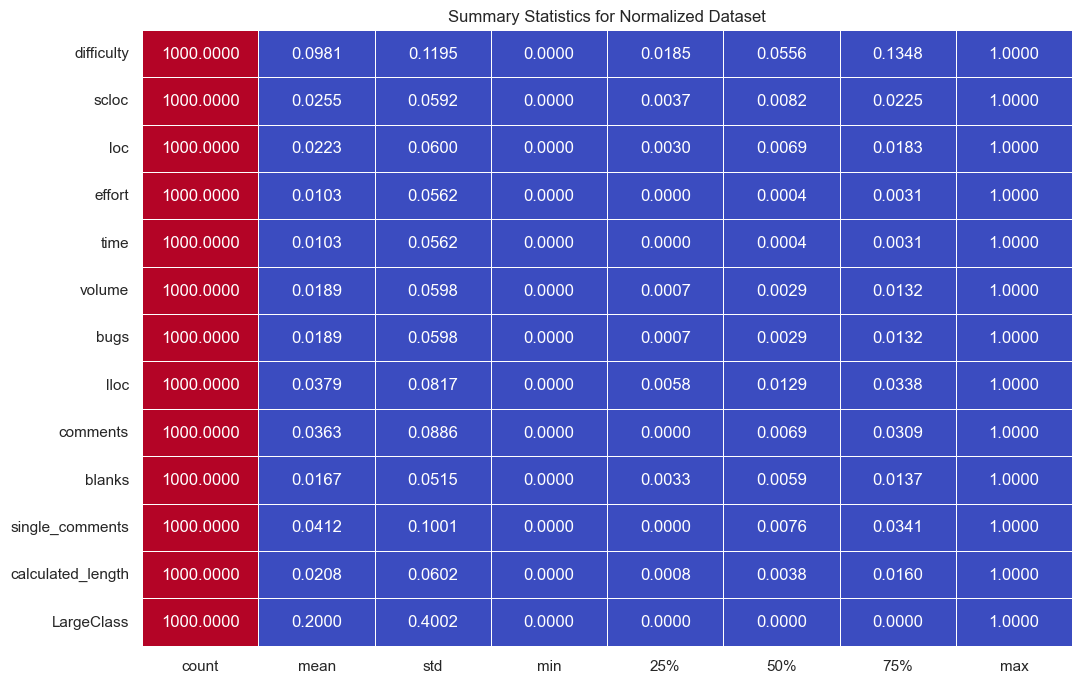

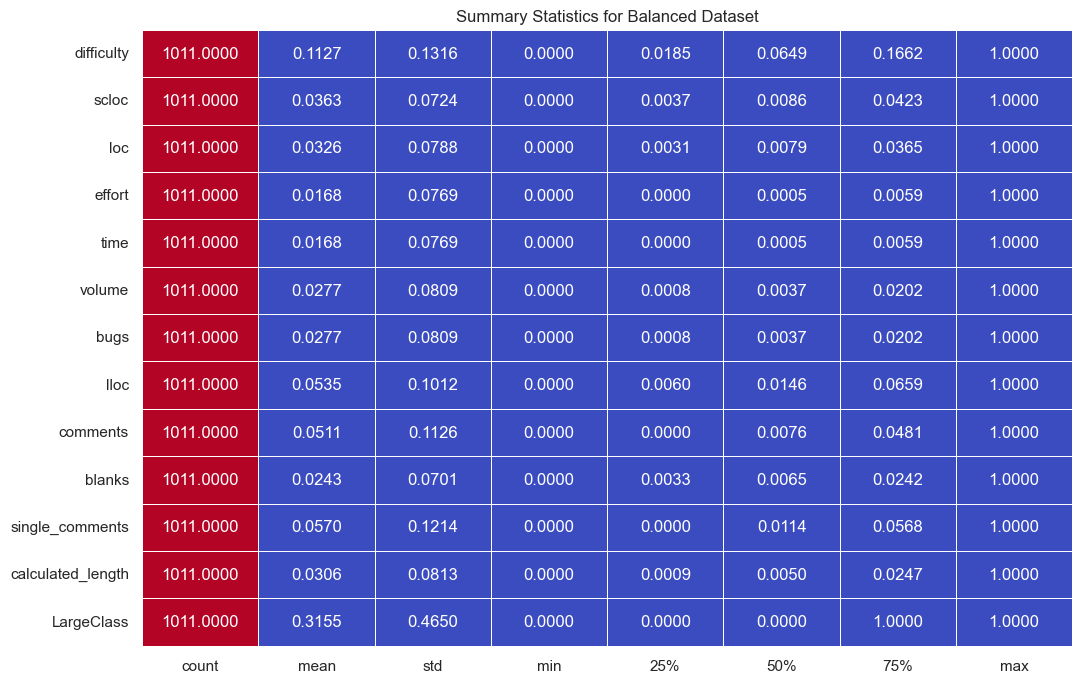

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
original_dataset = pd.read_csv("Python_LargeClassSmell_Dataset.csv")

# Display summary statistics in a table using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.heatmap(original_dataset.describe().transpose(), annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5, cbar=False)
plt.title("Summary Statistics for Original Dataset")
plt.show()

# Load the normalized dataset
normalized_dataset = pd.read_csv("Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv")

# Display summary statistics in a table using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.heatmap(normalized_dataset.describe().transpose(), annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5, cbar=False)
plt.title("Summary Statistics for Normalized Dataset")
plt.show()

# Load the balanced dataset
balanced_dataset = pd.read_csv("Balanced_LargeClassSmell_Dataset.csv")

# Display summary statistics in a table using Seaborn for the balanced dataset
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.heatmap(balanced_dataset.describe().transpose(), annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5, cbar=False)
plt.title("Summary Statistics for Balanced Dataset")
plt.show()


## Catboost

In [1]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from sklearn.utils.multiclass import unique_labels

def mean_confusion_matrix_catboost(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def CatBoost_Normal(file_name):
    global CatBoost_Scores
    global CatBoost_Accuracy
    global CatBoost_Confusion_Matrix

    Dataset = pd.read_csv(file_name)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    param_dist = {
        'iterations': [100, 200, 300],
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5],
    }

    catboost = CatBoostClassifier(verbose=False)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    catboost_cv = RandomizedSearchCV(catboost, param_dist, cv=rfolds, scoring=mcc)
    catboost_cv.fit(X, Y)

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix_catboost(catboost_cv.best_estimator_, X, Y, rfolds)

    CatBoost_Scores = np.mean(cross_val_score(catboost_cv.best_estimator_, X, Y, scoring=mcc, cv=rfolds))
    CatBoost_Accuracy = np.mean(cross_val_score(catboost_cv.best_estimator_, X, Y, scoring='accuracy', cv=rfolds))
    CatBoost_Confusion_Matrix = avg_confusion_matrix

    print("Tuned CatBoost Parameters: {}".format(catboost_cv.best_params_))
    print("Mean MCC score is {}".format(CatBoost_Scores))
    print("Mean accuracy is {}".format(CatBoost_Accuracy))
    print("Mean Confusion Matrix:\n", CatBoost_Confusion_Matrix)

In [32]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.utils.multiclass import unique_labels

def mean_confusion_matrix_catboost(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def CatBoost_SMOTENN(file_name):
    global CatBoost_Scores
    global CatBoost_Accuracy
    global CatBoost_Confusion_Matrix

    Dataset = pd.read_csv(file_name)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    # Define the SMOTEENN sampler
    smoteenn = SMOTEENN(sampling_strategy=0.5, random_state=42)

    # Apply SMOTEENN to X and Y
    X_resampled, Y_resampled = smoteenn.fit_resample(X, Y)

    param_dist = {
        'iterations': [100, 200, 300],
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5],
    }

    catboost = CatBoostClassifier(verbose=False)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    catboost_cv = RandomizedSearchCV(catboost, param_dist, cv=rfolds, scoring=mcc)
    catboost_cv.fit(X_resampled, Y_resampled)

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix_catboost(catboost_cv.best_estimator_, X_resampled, Y_resampled, rfolds)

    CatBoost_Scores = np.mean(cross_val_score(catboost_cv.best_estimator_, X_resampled, Y_resampled, scoring=mcc, cv=rfolds))
    CatBoost_Accuracy = np.mean(cross_val_score(catboost_cv.best_estimator_, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds))
    CatBoost_Confusion_Matrix = avg_confusion_matrix

    print("Tuned CatBoost Parameters: {}".format(catboost_cv.best_params_))
    print("Mean MCC score is {}".format(CatBoost_Scores))
    print("Mean accuracy is {}".format(CatBoost_Accuracy))
    print("Mean Confusion Matrix:\n", CatBoost_Confusion_Matrix)


## Decision Tree 

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

def mean_confusion_matrix_decision_tree(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def Decision_Tree(file_name):
    global DT_Scores
    global DT_accuracy
    global DT_confusion_matrix

    Dataset = pd.read_csv(file_name)
    
    param_dist = {
        'max_depth': [None] + list(range(0, 101)),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
        }
    
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]
    tree = DecisionTreeClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=rfolds, return_train_score=True, scoring=mcc)
    tree_cv.fit(X, Y)

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix_decision_tree(tree_cv.best_estimator_, X, Y, rfolds)

    DT_Scores = np.mean(cross_val_score(tree_cv.best_estimator_, X, Y, scoring=mcc, cv=rfolds))
    DT_accuracy = np.mean(cross_val_score(tree_cv.best_estimator_, X, Y, scoring='accuracy', cv=rfolds))
    DT_confusion_matrix = avg_confusion_matrix

    print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
    print("Mean MCC score is {}".format(DT_Scores))
    print("Mean accuracy is {}".format(DT_accuracy))
    print("Mean Confusion Matrix:\n", DT_confusion_matrix)


In [47]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from sklearn.utils.multiclass import unique_labels

def mean_confusion_matrix(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def Pruned_J48_with_AdaBoost(file_name):
    global DT_Scores
    global DT_accuracy
    global DT_confusion_matrix

    Dataset = pd.read_csv(file_name)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    param_dist = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'estimator__max_depth': list(np.arange(1, 100, step=1)) + [None],
        'estimator__min_samples_split': [2, 5, 10],
        'estimator__min_samples_leaf': [1, 2, 4]
    }

    best_mcc_score = -1
    best_accuracy = -1
    best_params = {}

    ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=0)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    ada_cv = RandomizedSearchCV(ada_boost, param_distributions=param_dist, cv=rfolds, n_iter=10, return_train_score=True, scoring=mcc)
    ada_cv.fit(X, Y)

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix(ada_cv.best_estimator_, X, Y, rfolds)

    DT_Scores = np.mean(cross_val_score(ada_cv.best_estimator_, X, Y, scoring=mcc, cv=rfolds))
    DT_accuracy = np.mean(cross_val_score(ada_cv.best_estimator_, X, Y, scoring='accuracy', cv=rfolds))
    DT_confusion_matrix = avg_confusion_matrix

    best_params = ada_cv.best_params_

    print("Tuned AdaBoost Parameters: {}".format(best_params))
    print("Mean MCC score is {}".format(DT_Scores))
    print("Mean accuracy is {}".format(DT_accuracy))
    print("Mean Confusion Matrix:\n", DT_confusion_matrix)

In [19]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from imblearn.combine import SMOTEENN  # Import SMOTEENN
from sklearn.utils.multiclass import unique_labels

def visualize_trees_ada_boost(model, X, Y, num_trees=5, save_path=None):
    # Visualize the first `num_trees` trees in the AdaBoost ensemble
    for i, tree in enumerate(model.estimators_[:num_trees]):
        plt.figure(figsize=(16, 12))  # Adjust the figsize as needed
        plot_tree(tree, filled=True, feature_names=X.columns, class_names=np.unique(Y).astype(str), rounded=True)
        plt.title(f"Decision Tree {i+1} in AdaBoost")
        if save_path:
            plt.savefig(f"{save_path}_tree_{i}.png", dpi=300)  # Adjust the dpi as needed
        plt.show()
        
def mean_confusion_matrix(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def Pruned_J48_with_AdaBoost_SMOTEENN(file_name):
    global DT_Scores
    global DT_accuracy
    global DT_confusion_matrix

    Dataset = pd.read_csv(file_name)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    smote_enn = SMOTEENN(random_state=0)
    X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

    param_dist = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'estimator__max_depth': list(np.arange(1, 100, step=1)) + [None],
        'estimator__min_samples_split': [2, 5, 10],
        'estimator__min_samples_leaf': [1, 2, 4]
    }
    
    param_dist = {
        'n_estimators': [100],
        'learning_rate': [1.0],
        'estimator__max_depth': [99],
        'estimator__min_samples_split': [5],
        'estimator__min_samples_leaf': [4]
    }

    best_mcc_score = -1
    best_accuracy = -1
    best_params = {}

    ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=0)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    ada_cv = RandomizedSearchCV(ada_boost, param_distributions=param_dist, cv=rfolds, n_iter=10, return_train_score=True, scoring=mcc)
    ada_cv.fit(X_resampled, Y_resampled)

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix(ada_cv.best_estimator_, X_resampled, Y_resampled, rfolds)

    DT_Scores = np.mean(cross_val_score(ada_cv.best_estimator_, X_resampled, Y_resampled, scoring=mcc, cv=rfolds))
    DT_accuracy = np.mean(cross_val_score(ada_cv.best_estimator_, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds))
    DT_confusion_matrix = avg_confusion_matrix

    best_params = ada_cv.best_params_

    print("Tuned AdaBoost Parameters: {}".format(best_params))
    print("Mean MCC score is {}".format(DT_Scores))
    print("Mean accuracy is {}".format(DT_accuracy))
    print("Mean Confusion Matrix:\n", DT_confusion_matrix)
    
    model_filename = 'dt_large_class_model.pkl'
    joblib.dump(ada_cv.best_estimator_, model_filename)
    visualize_trees_ada_boost(ada_cv.best_estimator_, X, Y, num_trees=5, save_path=model_filename)



In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from imblearn.combine import SMOTEENN

def mean_confusion_matrix(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def Decision_Tree_with_SMOTEENN(file_name):
    global DT_Scores
    global DT_accuracy
    global DT_confusion_matrix

    Dataset = pd.read_csv(file_name)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    # Apply SMOTEENN to balance the dataset
    smote_enn = SMOTEENN(random_state=0)
    X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

    # Define a grid of hyperparameters to try (modify this as needed)
    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss']
    }

    best_mcc_score = -1
    best_accuracy = -1
    best_params = {}

    dt = DecisionTreeClassifier(random_state=0)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    dt_cv = GridSearchCV(dt, param_grid=param_grid, cv=rfolds, scoring=mcc)
    dt_cv.fit(X_resampled, Y_resampled)  # Use the resampled data

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix(dt_cv.best_estimator_, X_resampled, Y_resampled, rfolds)

    DT_Scores = np.mean(cross_val_score(dt_cv.best_estimator_, X_resampled, Y_resampled, scoring=mcc, cv=rfolds))
    DT_accuracy = np.mean(cross_val_score(dt_cv.best_estimator_, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds))
    DT_confusion_matrix = avg_confusion_matrix

    print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))
    print("Mean MCC score is {}".format(DT_Scores))
    print("Mean accuracy is {}".format(DT_accuracy))
    print("Mean Confusion Matrix:\n", DT_confusion_matrix)

## Random Forest

In [7]:
def Random_Forest(file_name):
    global RF_Scores
    global RF_Accuracy
    Dataset = pd.read_csv(file_name)
    param_dist = {'n_estimators': [100, 200, 300]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    rf = RandomForestClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10) 
    mcc = make_scorer(matthews_corrcoef)
    rf_cv = RandomizedSearchCV(rf, param_dist, cv=rfolds, scoring = mcc)
    rf_cv.fit(X,Y)
    RF_Scores = cross_val_score(rf_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    RF_Accuracy = cross_val_score(rf_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
    print("Best MCC score is {}".format(RF_Scores.mean()))
    print("Best accuracy is {}".format(RF_Accuracy.mean()))

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

def mean_confusion_matrix_boosted(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def Boosted_Random_Forest(file_name):
    global RF_Scores
    global RF_Accuracy
    global RF_Confusion_Matrix
    
    Dataset = pd.read_csv(file_name)
    param_dist = {
        'n_estimators': [100, 200, 300],
        'estimator__max_depth': [None, 10, 20, 30],
        'estimator__min_samples_split': [2, 5, 10],
        'estimator__min_samples_leaf': [1, 2, 4]
    }
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]
    
    # Create a Random Forest base estimator
    rf_base = RandomForestClassifier()
    
    # Create an AdaBoost classifier with the Random Forest base estimator
    adaboost_rf = AdaBoostClassifier(estimator=rf_base)
    
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    
    # Use RandomizedSearchCV to tune the hyperparameters of AdaBoost with Random Forest
    adaboost_cv = RandomizedSearchCV(adaboost_rf, param_dist, cv=rfolds, scoring=mcc)
    adaboost_cv.fit(X, Y)
    
    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix_boosted(adaboost_cv.best_estimator_, X, Y, rfolds)
    
    RF_Scores = np.mean(cross_val_score(adaboost_cv.best_estimator_, X, Y, scoring=mcc, cv=rfolds))
    RF_Accuracy = np.mean(cross_val_score(adaboost_cv.best_estimator_, X, Y, scoring='accuracy', cv=rfolds))
    RF_Confusion_Matrix = avg_confusion_matrix

    print("Tuned AdaBoost with Random Forest Parameters: {}".format(adaboost_cv.best_params_))
    print("Mean MCC score is {}".format(RF_Scores))
    print("Mean accuracy is {}".format(RF_Accuracy))
    print("Mean Confusion Matrix:\n", RF_Confusion_Matrix)


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from imblearn.combine import SMOTEENN

def mean_confusion_matrix(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def Random_Forest_SMOTENN(file_name):
    global RF_Scores
    global RF_Accuracy
    global RF_Confusion_Matrix

    Dataset = pd.read_csv(file_name)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    # Define the SMOTEENN sampler
    smoteenn = SMOTEENN(sampling_strategy=0.5, random_state=42)

    # Apply SMOTEENN to X and Y
    X_resampled, Y_resampled = smoteenn.fit_resample(X, Y)

    param_dist = {
        'max_depth': [None, 10, 20, 30],
        'n_estimators': [100, 200, 300],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    rf_cv = RandomizedSearchCV(rf, param_dist, cv=rfolds, scoring=mcc)
    rf_cv.fit(X_resampled, Y_resampled)

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix(rf_cv.best_estimator_, X_resampled, Y_resampled, rfolds)

    RF_Scores = np.mean(cross_val_score(rf_cv.best_estimator_, X_resampled, Y_resampled, scoring=mcc, cv=rfolds))
    RF_Accuracy = np.mean(cross_val_score(rf_cv.best_estimator_, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds))
    RF_Confusion_Matrix = avg_confusion_matrix

    print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
    print("Mean MCC score is {}".format(RF_Scores))
    print("Mean accuracy is {}".format(RF_Accuracy))
    print("Mean Confusion Matrix:\n", RF_Confusion_Matrix)


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_predict
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from imblearn.combine import SMOTEENN

def mean_confusion_matrix(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def Boosted_Random_Forest_SMOTENN(file_name):
    global RF_Scores
    global RF_Accuracy
    global RF_Confusion_Matrix

    Dataset = pd.read_csv(file_name)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    # Define the SMOTEENN sampler
    smoteenn = SMOTEENN(sampling_strategy=0.5, random_state=42)

    # Apply SMOTEENN to X and Y
    X_resampled, Y_resampled = smoteenn.fit_resample(X, Y)

    param_dist = {
        'n_estimators': [100, 200, 300],
        'estimator__max_depth': [None, 10, 20, 30],
        'estimator__min_samples_split': [2, 5, 10],
        'estimator__min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestClassifier()

    # Create an AdaBoost classifier with the tuned Random Forest as the base estimator
    ada_rf = AdaBoostClassifier(estimator=rf)
    
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    
    adaboost_cv = RandomizedSearchCV(ada_rf, param_dist, cv=rfolds, scoring=mcc)
    adaboost_cv.fit(X, Y)

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix(ada_rf, X_resampled, Y_resampled, rfolds)

    RF_Scores = np.mean(cross_val_score(ada_rf, X_resampled, Y_resampled, scoring=mcc, cv=rfolds))
    RF_Accuracy = np.mean(cross_val_score(ada_rf, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds))
    RF_Confusion_Matrix = avg_confusion_matrix

    print("Tuned Random Forest Parameters: {}".format(adaboost_cv.best_params_))
    print("Mean MCC score with AdaBoost is {}".format(RF_Scores))
    print("Mean accuracy with AdaBoost is {}".format(RF_Accuracy))
    print("Mean Confusion Matrix:\n", RF_Confusion_Matrix)



## Logistic Regression

In [8]:
def Logistic_Regression(file_name):
    global LR_Scores
    global LR_Accuracy
    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset,random_state=0)
    param_dist = {'C': np.arange(0, 1, 0.01)}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    lr = LogisticRegression()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10) 
    mcc = make_scorer(matthews_corrcoef)
    lr_cv = RandomizedSearchCV(lr, param_dist, cv=rfolds, scoring = mcc)
    lr_cv.fit(X,Y)
    LR_Scores = cross_val_score(lr_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    LR_Accuracy = cross_val_score(lr_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(lr_cv.best_params_))
    print("Best MCC score is {}".format(LR_Scores.mean()))
    print("Best accuracy is {}".format(LR_Accuracy.mean()))

## XGBoost

In [23]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from sklearn.utils.multiclass import unique_labels

def mean_confusion_matrix(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def XGBoost(file_name):
    global XGBoost_Scores
    global XGBoost_accuracy
    global XGBoost_confusion_matrix

    Dataset = pd.read_csv(file_name)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    # Define a list of hyperparameters to try (modify this as needed)
    param_dist = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'n_estimators': [50, 100, 200]
    }

    best_mcc_score = -1
    best_accuracy = -1
    best_params = {}

    xgb = XGBClassifier(random_state=0)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    xgb_cv = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=rfolds, scoring=mcc)
    xgb_cv.fit(X, Y)  # Use the original data

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix(xgb_cv.best_estimator_, X, Y, rfolds)

    XGBoost_Scores = np.mean(cross_val_score(xgb_cv.best_estimator_, X, Y, scoring=mcc, cv=rfolds))
    XGBoost_accuracy = np.mean(cross_val_score(xgb_cv.best_estimator_, X, Y, scoring='accuracy', cv=rfolds))
    XGBoost_confusion_matrix = avg_confusion_matrix

    print("Tuned XGBoost Parameters: {}".format(xgb_cv.best_params_))
    print("Mean MCC score is {}".format(XGBoost_Scores))
    print("Mean accuracy is {}".format(XGBoost_accuracy))
    print("Mean Confusion Matrix:\n", XGBoost_confusion_matrix)


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from imblearn.combine import SMOTEENN

def visualize_trees(model, num_trees=5, save_path=None, format='png'):
    for i in range(num_trees):
        plot_tree(model, num_trees=i, rankdir='LR')
        if save_path:
            plt.savefig(f"{save_path}_tree_{i}.{format}", format=format, dpi=300)
        plt.show()
        
def mean_confusion_matrix(estimator, X, Y, cv):
    y_pred_list = []
    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, _ = Y.iloc[train_index], Y.iloc[test_index]

        estimator.fit(X_train, Y_train)
        y_pred = estimator.predict(X_test)
        y_pred_list.append(confusion_matrix(Y.iloc[test_index], y_pred, labels=unique_labels(Y, y_pred)))

    avg_confusion_matrix = np.mean(y_pred_list, axis=0)
    return avg_confusion_matrix

def XGBoost_with_SMOTEENN(file_name):
    global XGBoost_Scores
    global XGBoost_accuracy
    global XGBoost_confusion_matrix

    Dataset = pd.read_csv(file_name)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    # Apply SMOTEENN to balance the dataset
    smote_enn = SMOTEENN(random_state=0)
    X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

    # Define a list of hyperparameters to try (modify this as needed)
    param_dist = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'n_estimators': [50, 100, 200]
    }
    
    param_dist = {
        'learning_rate': [0.2],
        'max_depth': [5],
        'n_estimators': [100]
    }

    best_mcc_score = -1
    best_accuracy = -1
    best_params = {}

    xgb = XGBClassifier(random_state=0)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    xgb_cv = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=rfolds, scoring=mcc)
    xgb_cv.fit(X_resampled, Y_resampled)  # Use the resampled data

    # Confusion matrix for each fold
    avg_confusion_matrix = mean_confusion_matrix(xgb_cv.best_estimator_, X_resampled, Y_resampled, rfolds)

    XGBoost_Scores = np.mean(cross_val_score(xgb_cv.best_estimator_, X_resampled, Y_resampled, scoring=mcc, cv=rfolds))
    XGBoost_accuracy = np.mean(cross_val_score(xgb_cv.best_estimator_, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds))
    XGBoost_confusion_matrix = avg_confusion_matrix

    print("Tuned XGBoost Parameters: {}".format(xgb_cv.best_params_))
    print("Mean MCC score is {}".format(XGBoost_Scores))
    print("Mean accuracy is {}".format(XGBoost_accuracy))
    print("Mean Confusion Matrix:\n", XGBoost_confusion_matrix)
    
    model_filename = 'xgboost_long_method_model.pkl'
    visualize_trees(xgb_cv.best_estimator_, num_trees=10, save_path=model_filename, format='png')
    joblib.dump(xgb_cv.best_estimator_, model_filename)
    print("Number of Trees in the Model:", xgb_cv.best_estimator_.best_iteration)



## Support Vector Machine

In [9]:
def SVM(file_name):
    global SVM_Scores
    global SVM_Accuracy
    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset,random_state=0)
    param_dist = {"C": [.01, .1, 1, 5, 10, 100],"gamma": [0, .01, .1, 1, 5, 10, 100]}
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:,-1]
    svm_clf = svm.SVC()
    rfolds = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=10) 
    mcc = make_scorer(matthews_corrcoef)
    svm_cv = RandomizedSearchCV(svm_clf, param_dist, cv=rfolds, scoring = mcc)
    svm_cv.fit(X,Y)
    SVM_Scores = cross_val_score(svm_cv.best_estimator_,X,Y,scoring = mcc, cv=rfolds)
    SVM_Accuracy = cross_val_score(svm_cv.best_estimator_,X,Y,scoring = 'accuracy', cv=rfolds)
    print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
    print("Best MCC score is {}".format(SVM_Scores.mean()))
    print("Best accuracy is {}".format(SVM_Accuracy.mean()))

# Large Class Dataset 

In [33]:
CatBoost_SMOTENN('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned CatBoost Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 6}
Mean MCC score is 0.964791637816162
Mean accuracy is 0.9854571927781014
Mean Confusion Matrix:
 [[68.39  0.81]
 [ 0.64 31.26]]


In [31]:
CatBoost_Normal('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned CatBoost Parameters: {'learning_rate': 0.2, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 4}
Mean MCC score is 0.7788747767667001
Mean accuracy is 0.9314
Mean Confusion Matrix:
 [[77.49  2.51]
 [ 4.43 15.57]]


In [13]:
Random_Forest_SMOTENN('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Mean MCC score is 0.9641436831716405
Mean accuracy is 0.9844738885653271
Mean Confusion Matrix:
 [[68.25  0.95]
 [ 0.6  31.3 ]]


In [20]:
Decision_Tree('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 97}
Mean MCC score is 0.6987771682775233
Mean accuracy is 0.9069999999999999
Mean Confusion Matrix:
 [[76.11  3.89]
 [ 5.43 14.57]]


In [14]:
Random_Forest('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Decision Tree Parameters: {'n_estimators': 100}
Best MCC score is 0.7671344386946469
Best accuracy is 0.9264000000000001


In [38]:
Boosted_Random_Forest('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned AdaBoost with Random Forest Parameters: {'n_estimators': 100, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': None}
Mean MCC score is 0.7701262712252682
Mean accuracy is 0.9289000000000002
Mean Confusion Matrix:
 [[77.81  2.19]
 [ 4.88 15.12]]


In [21]:
Boosted_Random_Forest_SMOTENN('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned Random Forest Parameters: {'n_estimators': 300, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': 10}
Mean MCC score with AdaBoost is 0.9626974236482981
Mean accuracy with AdaBoost is 0.9842671325956124
Mean Confusion Matrix:
 [[68.22  0.98]
 [ 0.62 31.28]]


In [49]:
Pruned_J48_with_AdaBoost('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned AdaBoost Parameters: {'n_estimators': 200, 'learning_rate': 1.0, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 24}
Mean MCC score is 0.7741247323051148
Mean accuracy is 0.9299
Mean Confusion Matrix:
 [[77.69  2.31]
 [ 4.7  15.3 ]]


c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned AdaBoost Parameters: {'n_estimators': 100, 'learning_rate': 1.0, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': 99}
Mean MCC score is 0.9740460977470484
Mean accuracy is 0.9869454141542368
Mean Confusion Matrix:
 [[65.43  0.87]
 [ 0.92 69.88]]


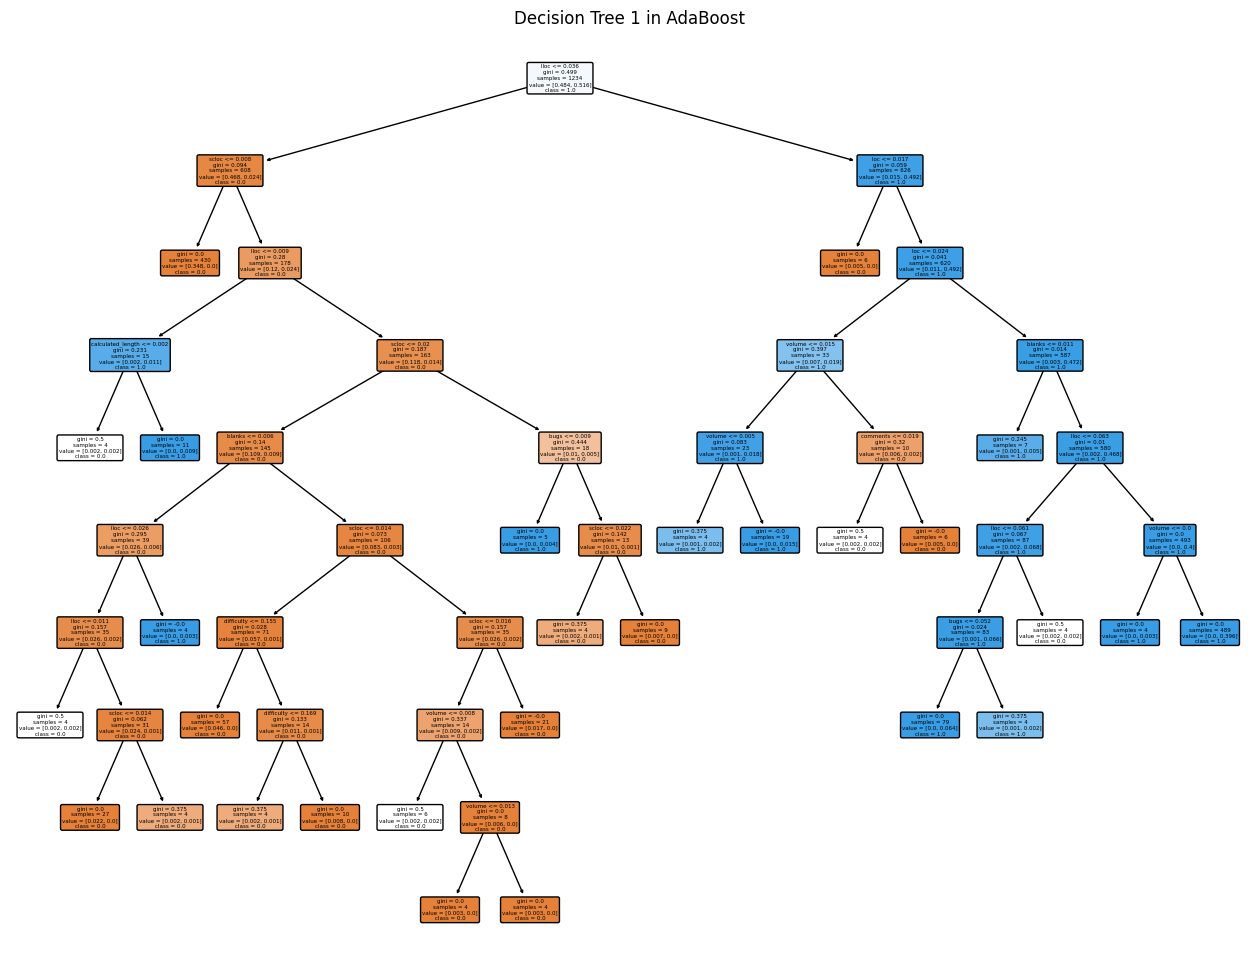

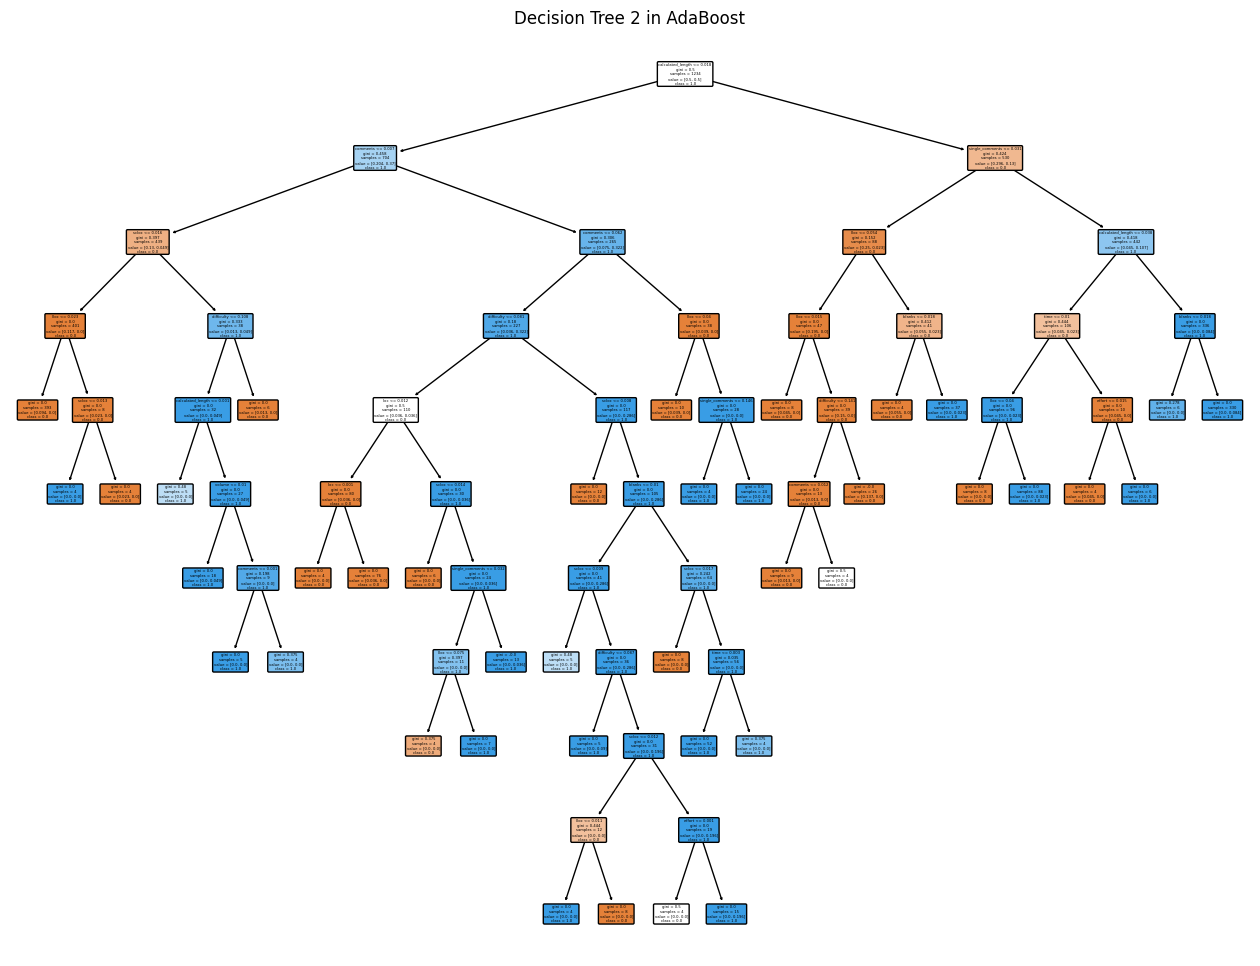

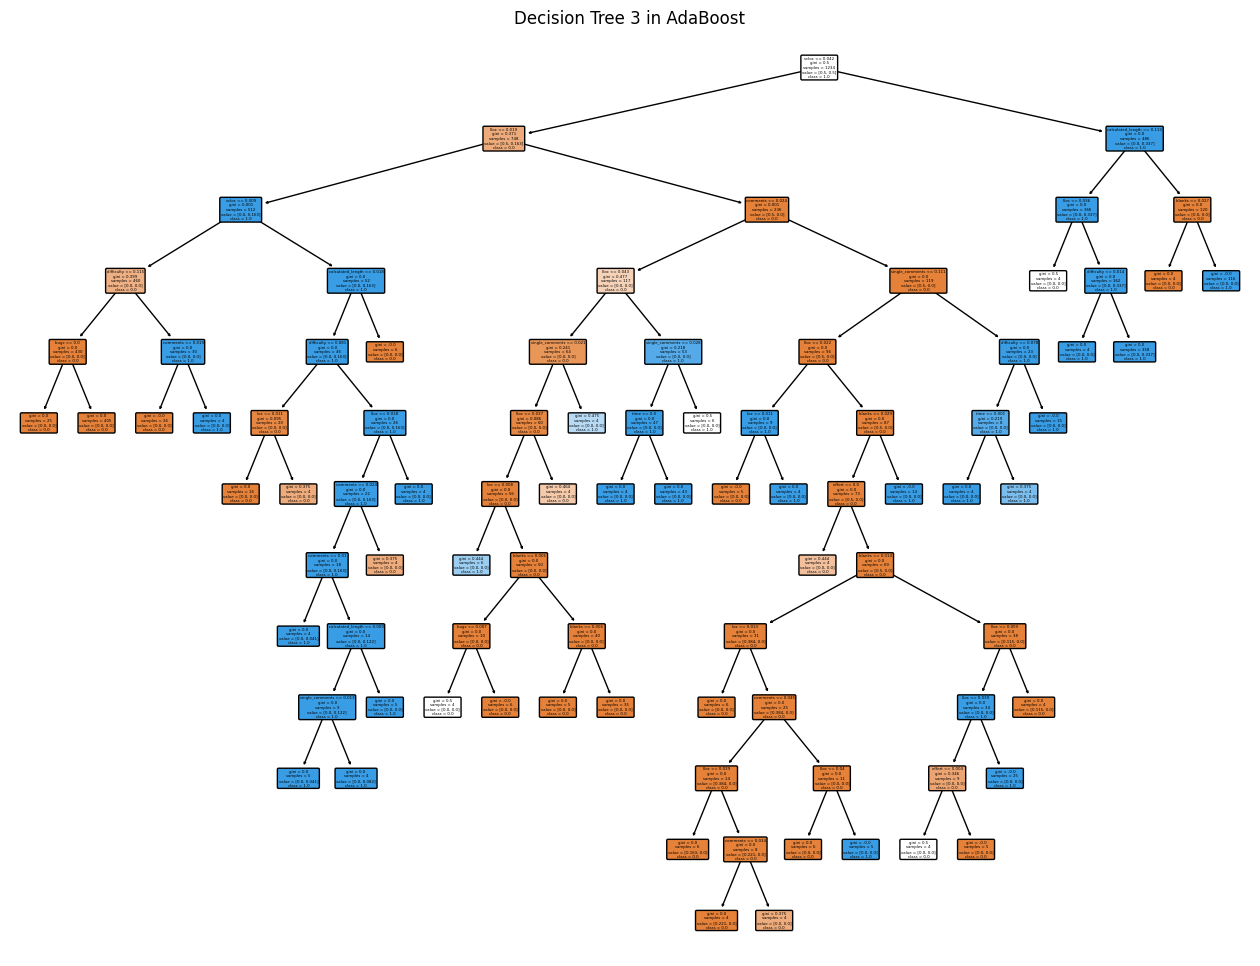

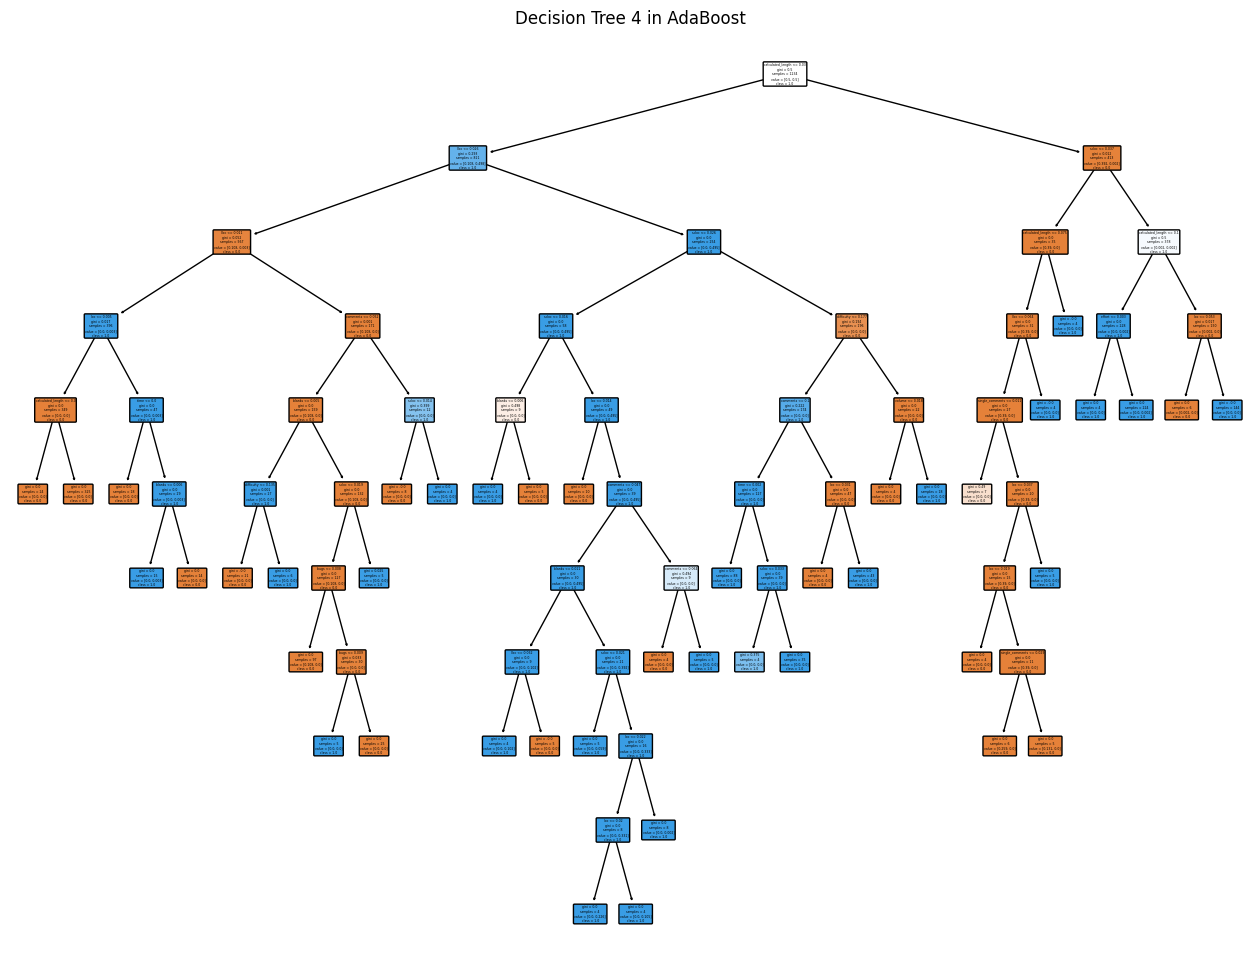

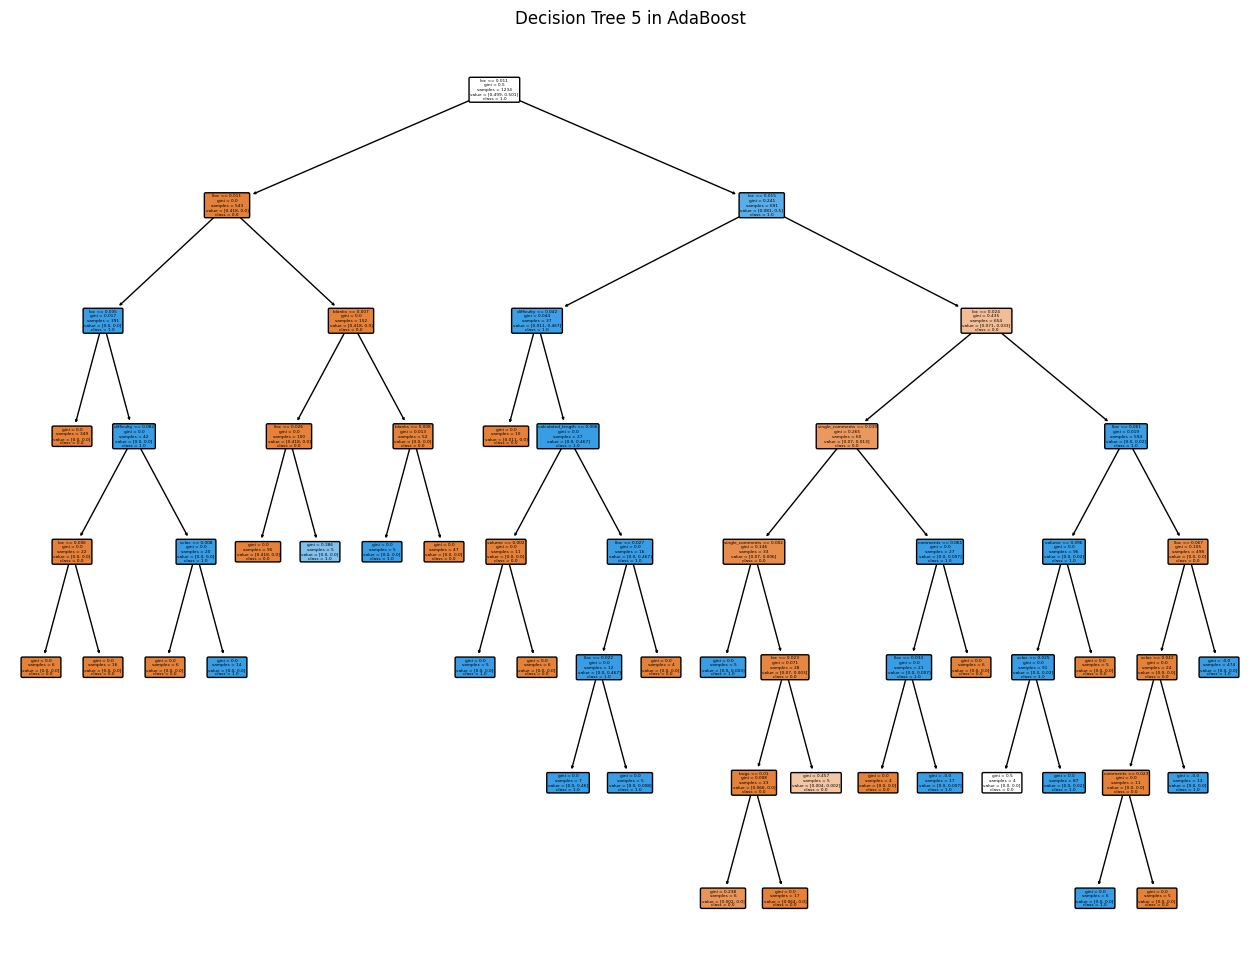

In [20]:
Pruned_J48_with_AdaBoost_SMOTEENN('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

In [5]:
Decision_Tree_with_SMOTEENN('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'criterion': 'entropy'}
Mean MCC score is 0.940866499123747
Mean accuracy is 0.9702417222045914
Mean Confusion Matrix:
 [[64.19  2.11]
 [ 1.97 68.83]]


In [24]:
XGBoost('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned XGBoost Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Mean MCC score is 0.7763623541401042
Mean accuracy is 0.9297
Mean Confusion Matrix:
 [[77.3   2.7 ]
 [ 4.33 15.67]]


In [26]:
XGBoost_with_SMOTEENN('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned XGBoost Parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2}
Mean MCC score is 0.9634685910372103
Mean accuracy is 0.98162329419232
Mean Confusion Matrix:
 [[65.03  1.27]
 [ 1.25 69.55]]


In [ ]:
Neural_Network('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

In [15]:
Logistic_Regression('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'C': 0.92}
Best MCC score is 0.5558043995765585
Best accuracy is 0.8741999999999999


In [17]:
SVM('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'gamma': 5, 'C': 10}
Best MCC score is 0.7633958038186333
Best accuracy is 0.9266000000000002


In [ ]:
MLP('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

In [ ]:
SGD('Normalized_Selected_Features_Python_LargeClassSmell_Dataset.csv')

mcc:  0.7009604571901724
accuracy:  0.9147


# Large Class Performance Gain

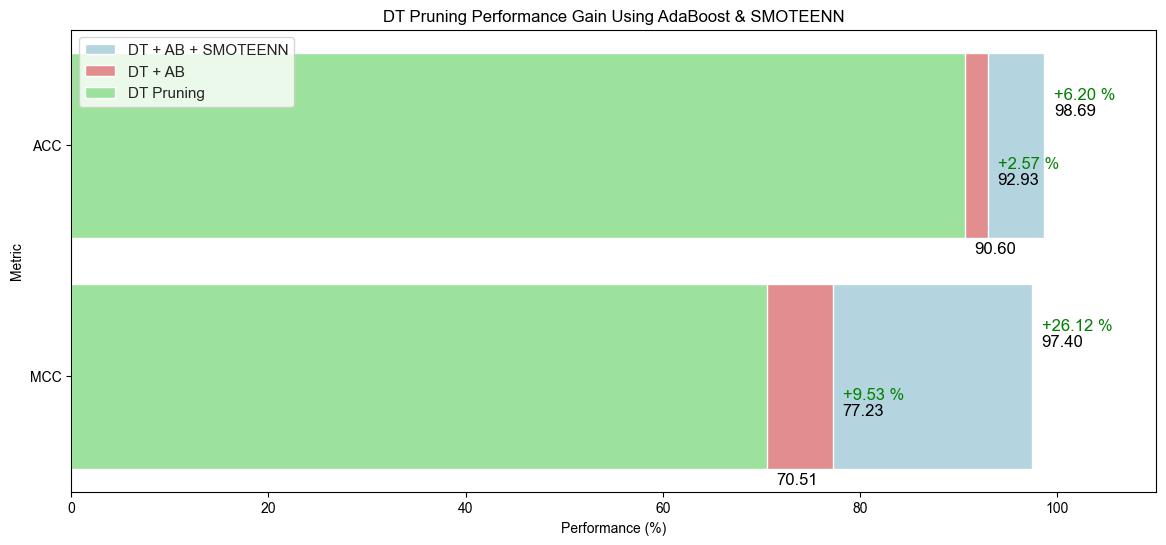

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

methods = ["ACC", "MCC"]

acc_values = [98.69, 97.40]
mcc_values = [92.93, 77.23]
ccc_values = [90.60, 70.51]

import pandas as pd
df = pd.DataFrame({
    "Metric": methods,
    "ACC (%)": acc_values,
    "MCC (%)": mcc_values,
    "CCC (%)": ccc_values,
})

fig, ax = plt.subplots(figsize=(14, 6))
sns.set(style="whitegrid")

# Use barplot for each metric separately
sns.barplot(x="ACC (%)", y="Metric", data=df, color="lightblue", label="DT + AB + SMOTEENN", ax=ax)
sns.barplot(x="MCC (%)", y="Metric", data=df, color="lightcoral", label="DT + AB", ax=ax)
sns.barplot(x="CCC (%)", y="Metric", data=df, color="lightgreen", label="DT Pruning", ax=ax)

# Label the bars
for i in range(len(methods)):
    ax.text(acc_values[i] + 1, i - 0.15, f"{acc_values[i]:.2f}", va="center", color="black")
    ax.text(mcc_values[i] + 1, i + 0.15, f"{mcc_values[i]:.2f}", va="center", color="black")
    ax.text(ccc_values[i] + 1, i + 0.45, f"{ccc_values[i]:.2f}", va="center", color="black")
    ax.text(acc_values[i] + 1, i - 0.22, f"+{((acc_values[i] - mcc_values[i]) / mcc_values[i]) * 100:.2f} %", va="center", color="green")
    ax.text(mcc_values[i] + 1, i + 0.08, f"+{((mcc_values[i] - ccc_values[i]) / ccc_values[i]) * 100:.2f} %", va="center", color="green")
    #ax.text(ccc_values[i] + 1, i + 0.3, f"More Details: {ccc_values[i] + 5:.2f}", va="center", color="gray")
    
ax.set_xlim(0, 110)
ax.set_xlabel("Performance (%)")
ax.set_title("DT Pruning Performance Gain Using AdaBoost & SMOTEENN")

ax.legend(loc="upper left")

plt.show()


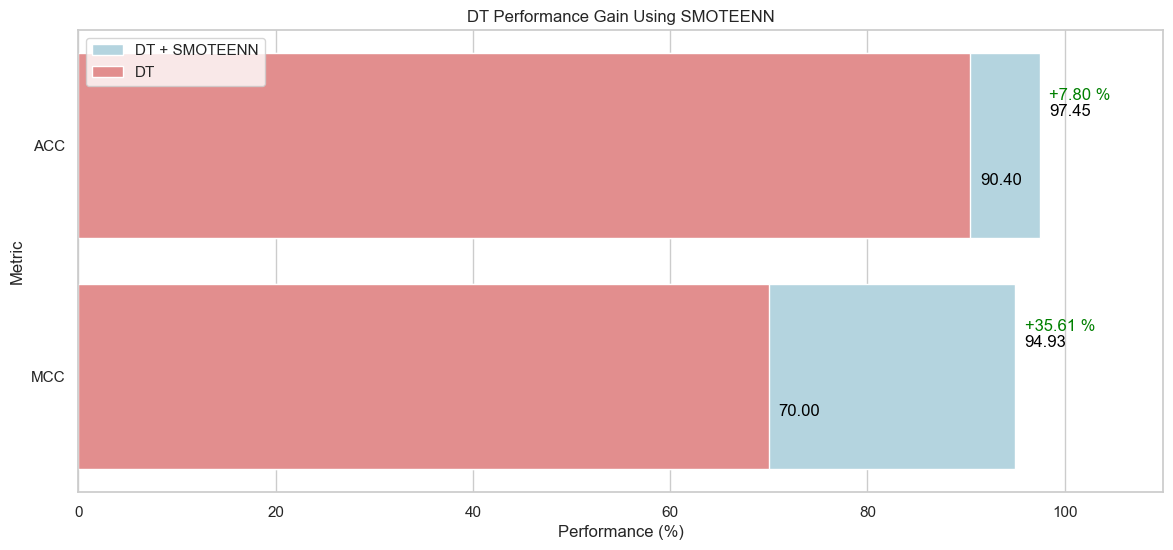

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

methods = ["ACC", "MCC"]

acc_values = [97.45, 94.93]
mcc_values = [90.4, 70]

import pandas as pd
df = pd.DataFrame({
    "Metric": methods,
    "ACC (%)": acc_values,
    "MCC (%)": mcc_values,
    "CCC (%)": ccc_values,
})

fig, ax = plt.subplots(figsize=(14, 6))
sns.set(style="whitegrid")

# Use barplot for each metric separately
sns.barplot(x="ACC (%)", y="Metric", data=df, color="lightblue", label="DT + SMOTEENN", ax=ax)
sns.barplot(x="MCC (%)", y="Metric", data=df, color="lightcoral", label="DT", ax=ax)

# Label the bars
for i in range(len(methods)):
    ax.text(acc_values[i] + 1, i - 0.15, f"{acc_values[i]:.2f}", va="center", color="black")
    ax.text(mcc_values[i] + 1, i + 0.15, f"{mcc_values[i]:.2f}", va="center", color="black")
    ax.text(acc_values[i] + 1, i - 0.22, f"+{((acc_values[i] - mcc_values[i]) / mcc_values[i]) * 100:.2f} %", va="center", color="green")
    #ax.text(ccc_values[i] + 1, i + 0.3, f"More Details: {ccc_values[i] + 5:.2f}", va="center", color="gray")
    
ax.set_xlim(0, 110)
ax.set_xlabel("Performance (%)")
ax.set_title("DT Performance Gain Using SMOTEENN")

ax.legend(loc="upper left")

plt.show()


# Long Method Dataset 

In [27]:
XGBoost('Normalized_LongMethodSmell_Dataset.csv')

Tuned XGBoost Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Mean MCC score is 0.89448934943288
Mean accuracy is 0.9615205992509366
Mean Confusion Matrix:
 [[66.58  1.92]
 [ 1.52 19.38]]


c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned XGBoost Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2}
Mean MCC score is 0.9938078980875125
Mean accuracy is 0.9968831746031748
Mean Confusion Matrix:
 [[60.7   0.2 ]
 [ 0.19 64.01]]


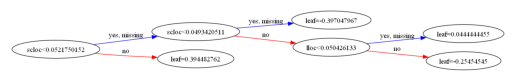

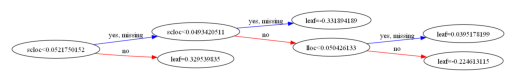

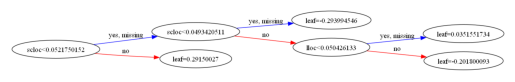

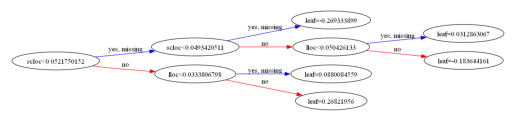

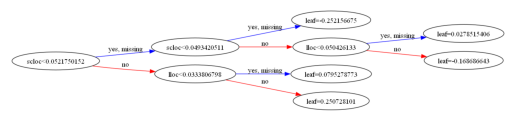

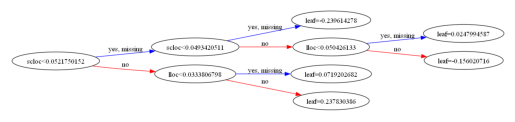

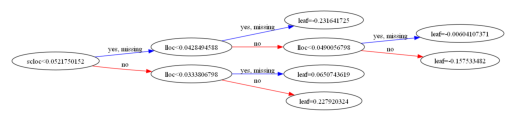

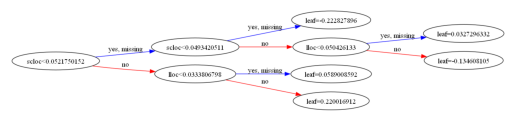

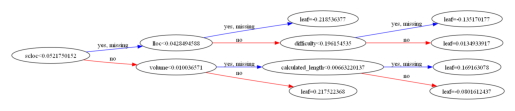

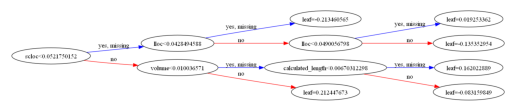

Number of Trees in the Model: 99


In [12]:
XGBoost_with_SMOTEENN('Normalized_LongMethodSmell_Dataset.csv')

In [30]:
CatBoost_Normal('Normalized_LongMethodSmell_Dataset.csv')

Tuned CatBoost Parameters: {'learning_rate': 0.2, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 8}
Mean MCC score is 0.8890927099244337
Mean accuracy is 0.9590811485642948
Mean Confusion Matrix:
 [[66.48  2.02]
 [ 1.69 19.21]]


In [34]:
CatBoost_SMOTENN('Normalized_LongMethodSmell_Dataset.csv')

Tuned CatBoost Parameters: {'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 6}
Mean MCC score is 0.9923518892011838
Mean accuracy is 0.9966491885143571
Mean Confusion Matrix:
 [[61.6  0.3]
 [ 0.  27.7]]


In [14]:
Random_Forest_SMOTENN('Normalized_LongMethodSmell_Dataset.csv')

Tuned Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Mean MCC score is 0.9915881001469445
Mean accuracy is 0.9966479400749064
Mean Confusion Matrix:
 [[61.6  0.3]
 [ 0.  27.7]]


In [42]:
Boosted_Random_Forest('Normalized_LongMethodSmell_Dataset.csv')

Tuned AdaBoost with Random Forest Parameters: {'n_estimators': 300, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': 10}
Mean MCC score is 0.8800962725100591
Mean accuracy is 0.9550461922596756
Mean Confusion Matrix:
 [[66.59  1.91]
 [ 1.89 19.01]]


In [22]:
Boosted_Random_Forest_SMOTENN('Normalized_LongMethodSmell_Dataset.csv')

Tuned Random Forest Parameters: {'n_estimators': 300, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': 10}
Mean MCC score with AdaBoost is 0.990002873647018
Mean accuracy with AdaBoost is 0.9954257178526841
Mean Confusion Matrix:
 [[61.57  0.33]
 [ 0.11 27.59]]


In [6]:
Decision_Tree_with_SMOTEENN('Normalized_LongMethodSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'criterion': 'gini'}
Mean MCC score is 0.9901584705417298
Mean accuracy is 0.9950457142857144
Mean Confusion Matrix:
 [[60.55  0.35]
 [ 0.27 63.93]]


In [22]:
Decision_Tree('Normalized_LongMethodSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3}
Mean MCC score is 0.8740998356386541
Mean accuracy is 0.9547028714107367
Mean Confusion Matrix:
 [[67.05  1.45]
 [ 2.57 18.33]]


In [54]:
Pruned_J48_with_AdaBoost('Normalized_LongMethodSmell_Dataset.csv')

Tuned AdaBoost Parameters: {'n_estimators': 50, 'learning_rate': 1.0, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 45}
Mean MCC score is 0.8810834195041416
Mean accuracy is 0.9569350811485645
Mean Confusion Matrix:
 [[66.6   1.9 ]
 [ 1.95 18.95]]


In [55]:
Pruned_J48_with_AdaBoost_SMOTEENN('Normalized_LongMethodSmell_Dataset.csv')

Tuned AdaBoost Parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 16}
Mean MCC score is 0.9933304207407118
Mean accuracy is 0.9966431746031748
Mean Confusion Matrix:
 [[60.62  0.28]
 [ 0.14 64.06]]


In [65]:
Random_Forest('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Tuned Decision Tree Parameters: {'n_estimators': 200}
Best MCC score is 0.875296785720118
Best accuracy is 0.9550312109862673


In [ ]:
Logistic_Regression('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

In [ ]:
SVM('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

In [ ]:
MLP('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

In [77]:
SGD('Python_LongMethodSmell_Dataset_Scaled_GainRatio.csv')

mcc:  0.7310678630455435
accuracy:  0.9085880149812736
